# THIS CODE IS USED TO TRAIN THE BOLT DETECTION MODEL USING YOLOv8

PRE PROCESSING ARE DONE IN ROBOFLOW


In [ ]:
# update ultralytics module to the latest one

!pip install ultralytics --upgrade


note: installation of Ultralytics package to implement YOLO

# IMPORTS YOLO CLASS FROM ULTRALYTICS LIBRARY AND CHECK THE YOLO VERSION INSTALLED

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 532, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'track', 'val', 'export', 'predict', 'benchmark', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'segment', 'classify', 'pose', 'obb'}
                MODE (required) is one of {'track', 'val', 'export', 'predict', 'benchmark', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# DOWNLOAD THE ANNOTATED DATASET FROM ROBOFLOW PERMANENTLY ON LOCAL DRIVE

In [ ]:
# Install the Roboflow library
!pip install roboflow

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Roboflow and OS module for file operations
from roboflow import Roboflow
import os
import shutil

# Initialize Roboflow with your API key
rf = Roboflow(api_key="VD9VebLGe7judCNzjEjy")

# Access the specific project and version
project = rf.workspace("mlgroupassignment").project("bolt-xoyve")
version = project.version(3)

# Download the dataset to the default temporary directory
dataset = version.download("yolov8")

# Define the path where the dataset should be saved in your Google Drive
save_path = '/content/drive/My Drive/Colab Notebooks/Bolt Dataset2'

# Create the target directory if it doesn't exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Move the dataset to the specified path
shutil.move(dataset.location, save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.30, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Bolt-3 in yolov8:: 100%|██████████| 1630/1630 [00:00<00:00, 6227.43it/s]


'/content/drive/My Drive/Colab Notebooks/Bolt Dataset2/Bolt-3'

This code performs several tasks: it installs the Roboflow library, mounts Google Drive, initializes Roboflow with an API key, accesses a specific project and version, downloads the dataset, and saves it to a designated folder in Google Drive.

1. Install the Roboflow library.
2. Mount Google Drive.
3. Import necessary modules.
4. Initialize Roboflow with your API key.
5. Access the specific project and version.
6. Download the dataset.
7. Define the save path in Google Drive.
8. Create the target directory if it doesn't exist.
9. Move the dataset to the specified path.

# MODEL TRAINING USING YOLOv8 ARCHITECTURE

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml' epochs=40 imgsz=640


100% 6.23M/6.23M [00:00<00:00, 326MB/s]
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

note:
This command initiates training for a YOLOv8 model, specifically for object detection, using a given dataset and configuration. Below is a detailed explanation of each part of the command:

1. **!yolo**: Runs the YOLOv8 command-line interface.
2. **task=detect**: Specifies that the task is object detection.
3. **mode=train**: Indicates that the mode is training.
4. **model=yolov8n.pt**: Specifies the model architecture and pre-trained weights to use (YOLOv8n).
5. **data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml'**: Points to the data configuration file that includes paths to training, validation, and test datasets.
6. **epochs=40**: Sets the number of training epochs to 40.
7. **imgsz=640**: Sets the image size for training to 640x640 pixels.

### Model Training Command
```bash
!yolo task=detect mode=train model=yolov8n.pt data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml' epochs=40 imgsz=640
```

### Explanation
- **Command**: `!yolo`
  - Runs the YOLOv8 command-line interface.

- **Task**: `task=detect`
  - Specifies that the task is object detection.

- **Mode**: `mode=train`
  - Indicates that the mode is training.

- **Model**: `model=yolov8n.pt`
  - Specifies the model architecture and pre-trained weights to use (YOLOv8n).

- **Data**: `data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml'`
  - Points to the data configuration file that includes paths to training, validation, and test datasets.

- **Epochs**: `epochs=40`
  - Sets the number of training epochs to 40.

- **Image Size**: `imgsz=640`
  - Sets the image size for training to 640x640 pixels.

This command will train the YOLOv8n model using the specified dataset and configuration for 40 epochs with images resized to 640x640 pixels.

# COPY TRAINING RESULTS TO GOOGLE DRIVE

In [ ]:
import shutil

# Define the source and destination paths
source_path = 'runs/detect/train'
destination_path = '/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train'

# Copy the directory
shutil.copytree(source_path, destination_path)


'/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train'

CONFUSION MATRIX

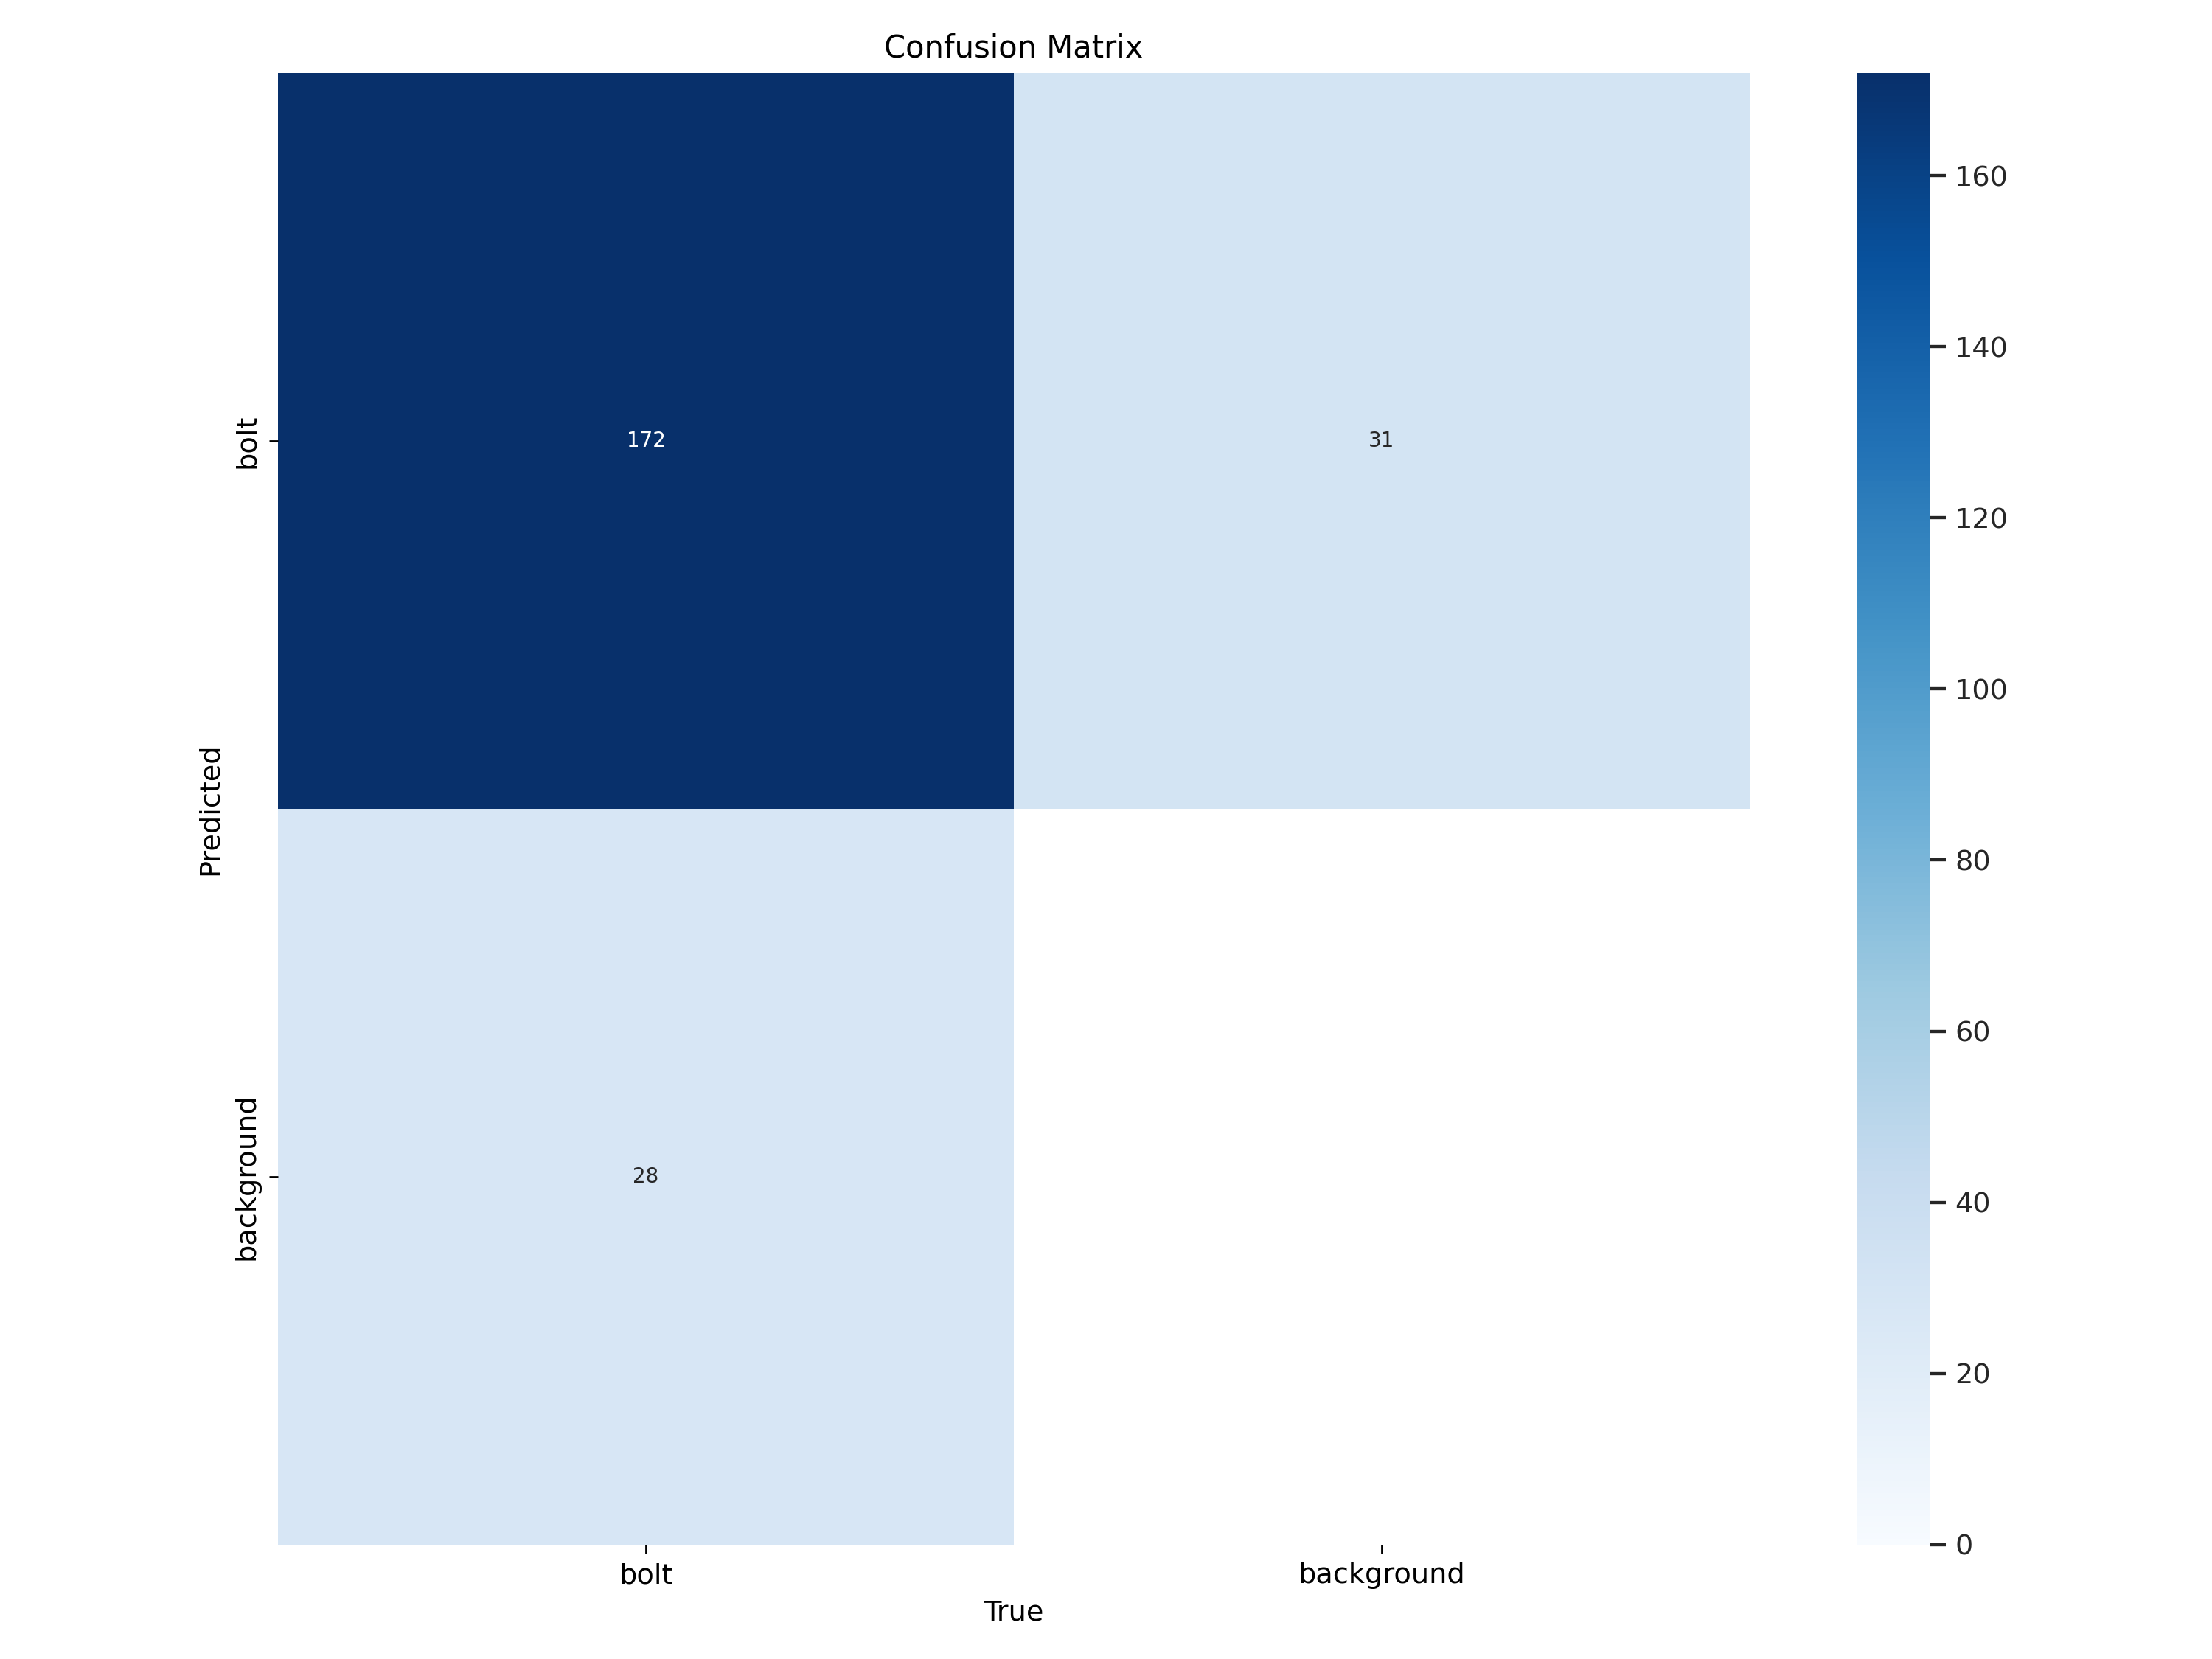

In [ ]:
from IPython.display import Image  # This ensures you are using the Image class from IPython.display

# Now you can display the image using the correct class
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

Note:
The confusion matrix you provided evaluates the performance of a YOLOv8 model for single object detection of bolts. Here's the breakdown of the confusion matrix:

- **True Positive (TP)**: 172 (correctly detected bolts)
- **False Negative (FN)**: 31 (bolts that were missed and classified as background)
- **False Positive (FP)**: 28 (background falsely detected as bolts)
- **True Negative (TN)**: The background that was correctly identified as background is not directly visible in this confusion matrix but can be inferred based on the total counts.


### Interpretation:
- The model performs reasonably well with a precision and recall both around 85-86%, indicating a good balance between correctly detecting bolts and minimizing false detections.
- There are some misclassifications, with 31 bolts missed (FN) and 28 background images falsely identified as bolts (FP).

Improvements could focus on reducing false positives and false negatives, potentially by refining the model, using more data, or fine-tuning the detection parameters.

PRECISION RECALL-CURVE

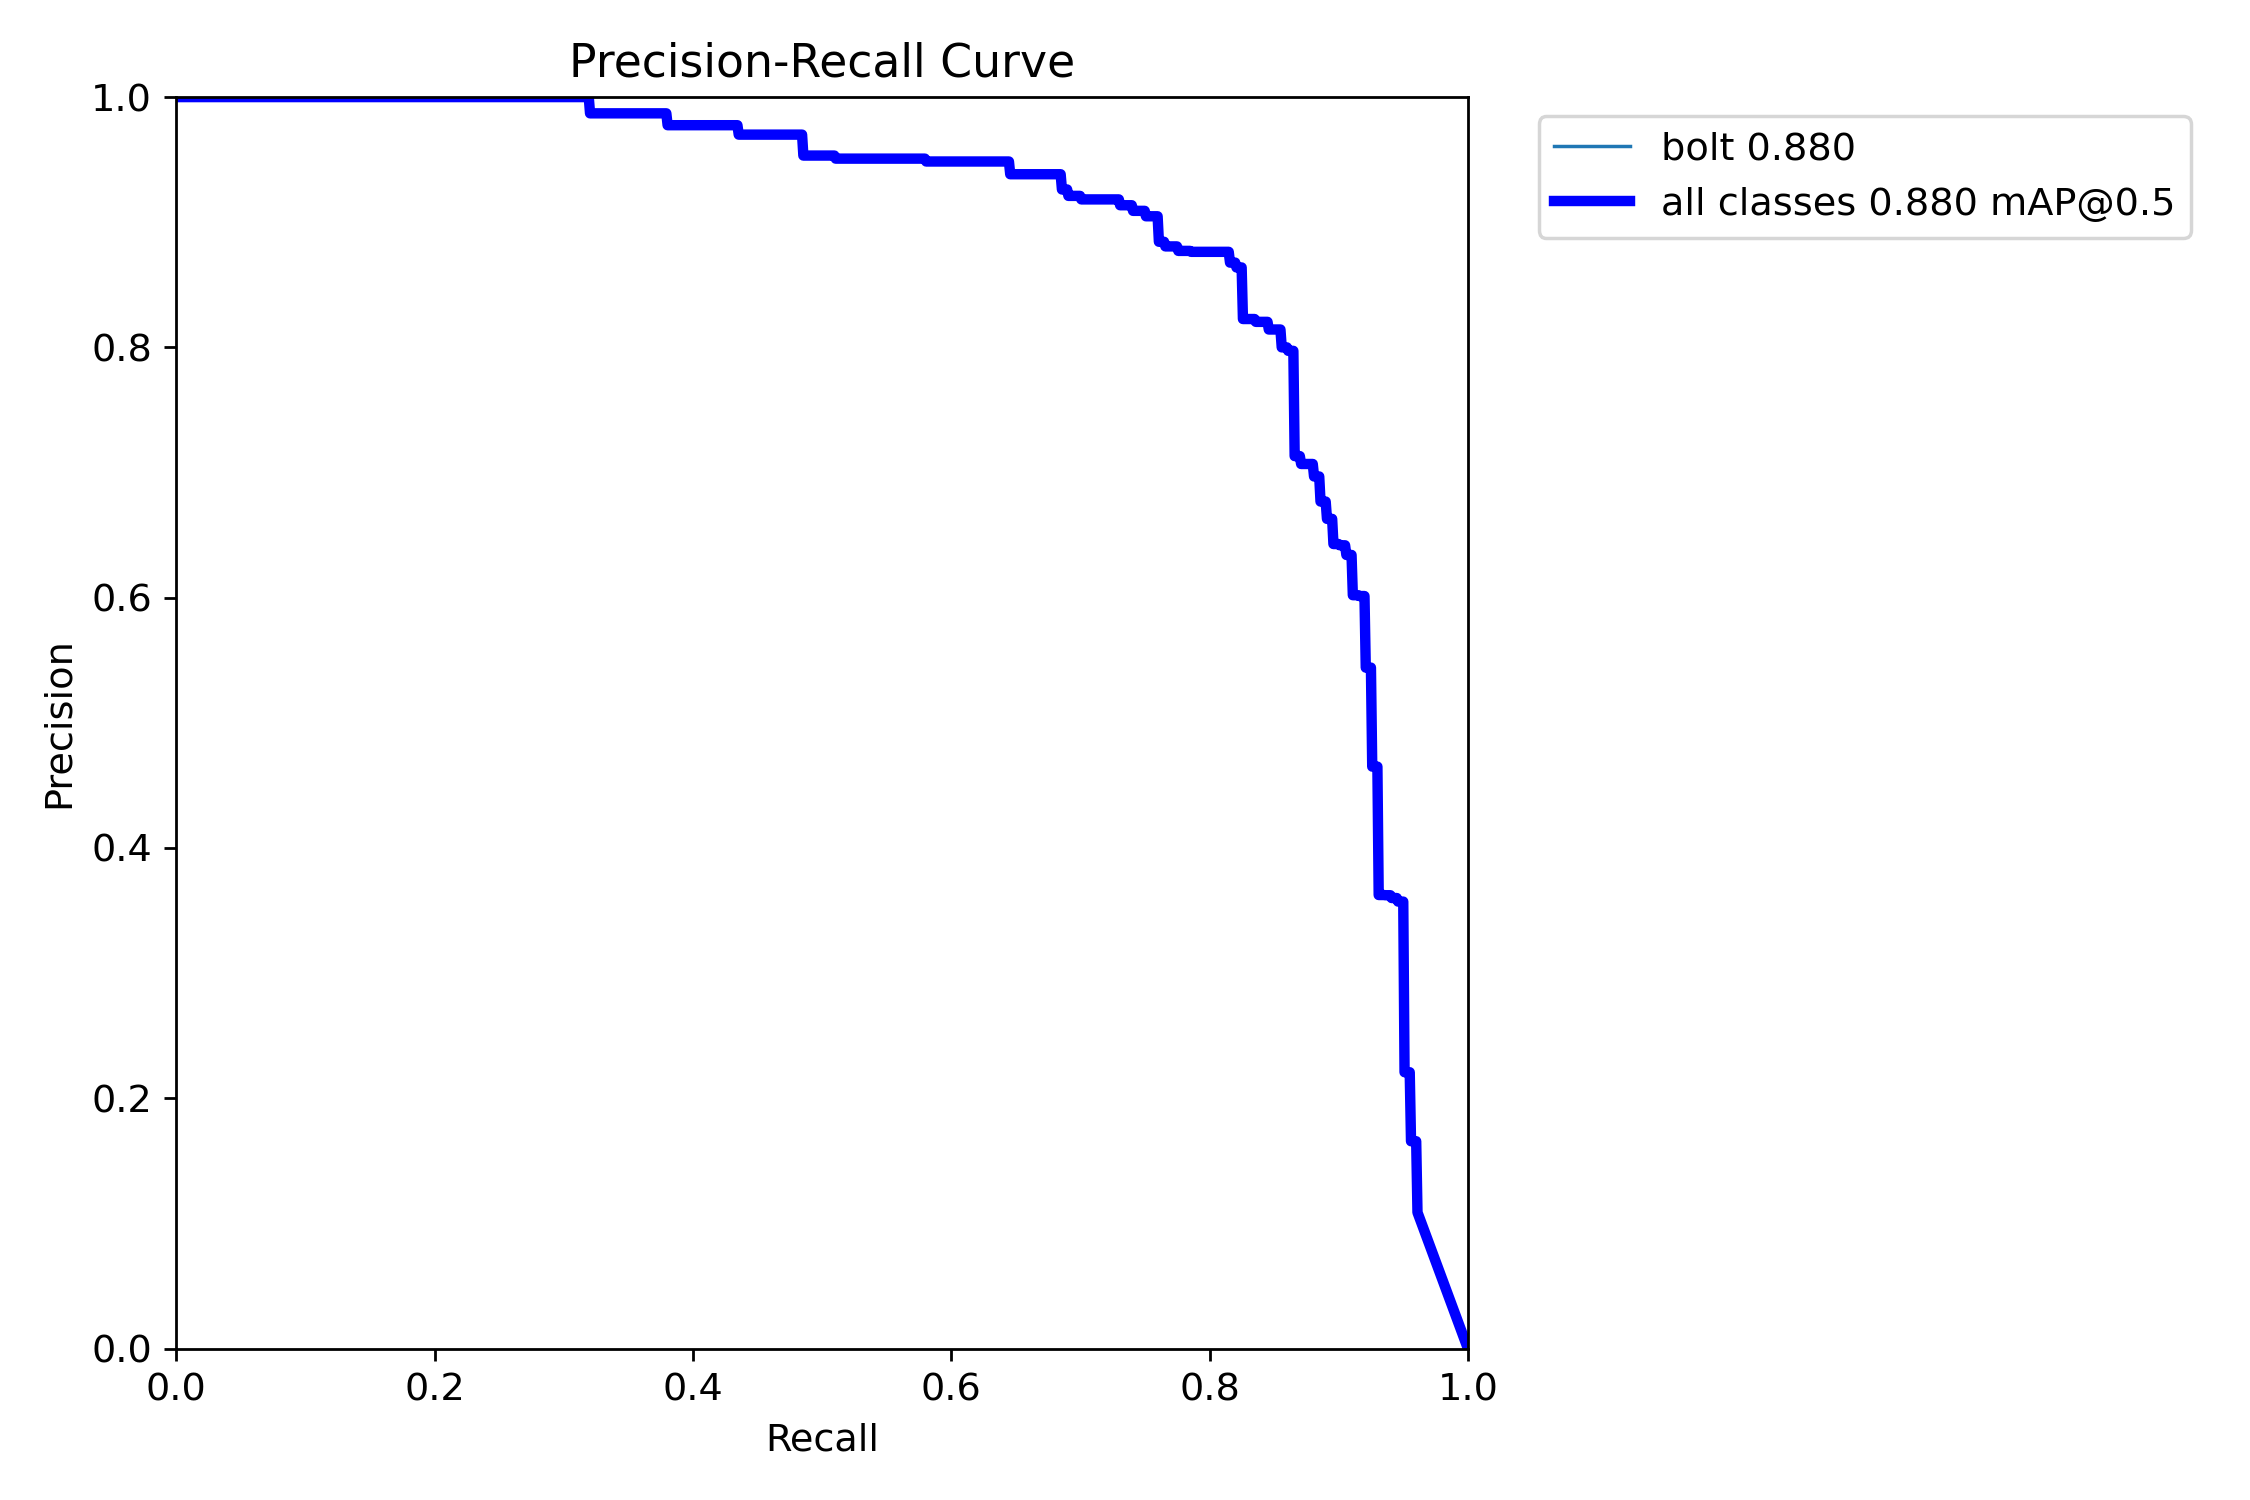

In [ ]:
from IPython.display import Image  # This ensures you are using the Image class from IPython.display

# Now you can display the image using the correct class
Image(filename='/content/runs/detect/train/PR_curve.png', width=600)

### Evaluation of the Precision-Recall Curve

The Precision-Recall curve provided shows the trade-off between precision and recall for the YOLOv8 model trained to detect bolts. Let's evaluate the key aspects of this curve:

1. **Axes**:
   - **X-axis (Recall)**: Recall measures the ability of the model to find all the relevant instances in the dataset. It is defined as the ratio of true positives to the sum of true positives and false negatives.
   - **Y-axis (Precision)**: Precision measures the ability of the model to accurately identify only relevant instances. It is defined as the ratio of true positives to the sum of true positives and false positives.

2. **Curve Analysis**:
   - The curve starts at the top-left corner, which indicates a high precision and low recall. As we move to the right, recall increases, and precision decreases.
   - The shape of the curve shows a typical pattern where increasing recall results in decreasing precision. This is expected as the model starts identifying more true positives but also more false positives.

3. **Performance Metrics**:
   - **AP (Average Precision)**: The average precision for detecting bolts is 0.880, as indicated in the legend. This value summarizes the precision-recall curve and is a commonly used metric to evaluate object detection models.
   - **mAP (Mean Average Precision)**: The mAP@0.5 is also 0.880 for all classes. This indicates that the model's performance is consistent across different classes, although in this case, there is only one class (bolt).

### Interpretation:
- **High Precision at Lower Recalls**: The model performs well in terms of precision when recall is low, meaning it makes few false positive errors when it predicts a bolt.
- **Decreasing Precision at Higher Recalls**: As recall increases, precision decreases, indicating that while the model finds more true positives, it also makes more false positive errors.
- **Overall Performance**: With an AP of 0.880, the model demonstrates a strong performance in detecting bolts, balancing precision and recall effectively.

In summary, the model shows a good ability to detect bolts with high precision and recall, and the precision-recall curve supports the effectiveness of the YOLOv8 model for this single object detection task. Further fine-tuning and additional training data could improve the performance even further.

# MODEL PERFORMANCE ON VALIDATION SET

In [ ]:
!yolo task=detect mode=val model='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/weights/best.pt' data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml' imgsz=640


Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/valid/labels.cache... 67 images, 1 backgrounds, 0 corrupt: 100% 67/67 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.36it/s]
                   all         67        200      0.874      0.815      0.879      0.566
Speed: 2.6ms preprocess, 14.4ms inference, 0.0ms loss, 31.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


This command validates a YOLOv8 model for object detection using a specified dataset and configuration using validation set

### Model Validation Command
```bash
!yolo task=detect mode=val model='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/weights/best.pt' data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml' imgsz=640
```

### Explanation
- **Command**: `!yolo`
  - Runs the YOLOv8 command-line interface.

- **Task**: `task=detect`
  - Specifies that the task is object detection.

- **Mode**: `mode=val`
  - Indicates that the mode is validation.

- **Model**: `model='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/weights/best.pt'`
  - Specifies the path to the model weights file that will be used for validation.

- **Data**: `data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml'`
  - Points to the data configuration file that includes paths to training, validation, and test datasets.

- **Image Size**: `imgsz=640`
  - Sets the image size for validation to 640x640 pixels.


# TRAINING LOSSES CURVE, VALIDATION LOSSES CURVE AND METRIC CURVE FOR VALIDATION SET PLOT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results.csv file
results_path = '/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/results.csv'  # Update the path if necessary

# Load the CSV file into a DataFrame
results_df = pd.read_csv(results_path)

# Strip leading and trailing whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Display the first few rows of the DataFrame to inspect the column names
print(results_df.head())

# Display the column names to verify them
print(results_df.columns)


   epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1          1.5946          2.5258          1.4424   
1      2          1.5965          1.8942          1.4331   
2      3          1.6061          1.7450          1.4464   
3      4          1.6258          1.6463          1.4554   
4      5          1.6011          1.5815          1.4470   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.84610            0.16493           0.51288   
1               0.47523            0.48000           0.39838   
2               0.28848            0.34500           0.20733   
3               0.59327            0.54000           0.56149   
4               0.64865            0.71077           0.71315   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.23870        1.4162        2.6837        1.2264  0.000652   
1              0.20519        1.4934        1.9860        1.3454  0.001286   
2              0.106

This code snippet performs several tasks: it imports necessary libraries, loads a CSV file into a pandas DataFrame, cleans the column names, and displays the first few rows and the column names of the DataFrame. Here's a breakdown:

1. **Import Libraries**:
   - Imports `pandas` for data manipulation and `matplotlib.pyplot` for plotting.

2. **Specify Path**:
   - Defines the path to the `results.csv` file, which contains the training results.

3. **Load CSV**:
   - Loads the CSV file into a pandas DataFrame using `pd.read_csv`.

4. **Clean Column Names**:
   - Strips leading and trailing whitespace from the column names to ensure they are clean and consistent.

5. **Display Data**:
   - Prints the first few rows of the DataFrame to inspect the data.
   - Prints the column names to verify they are correct.

### Explanation:
- **Import Libraries**: Imports pandas and matplotlib.pyplot for data handling and visualization.
- **Specify Path**: Sets the path to the CSV file containing the training results.
- **Load CSV**: Reads the CSV file into a DataFrame.
- **Clean Column Names**: Removes any leading or trailing whitespace from the column names.
- **Display Data**: Shows the first few rows and the column names of the DataFrame to verify the data has been loaded and cleaned correctly.

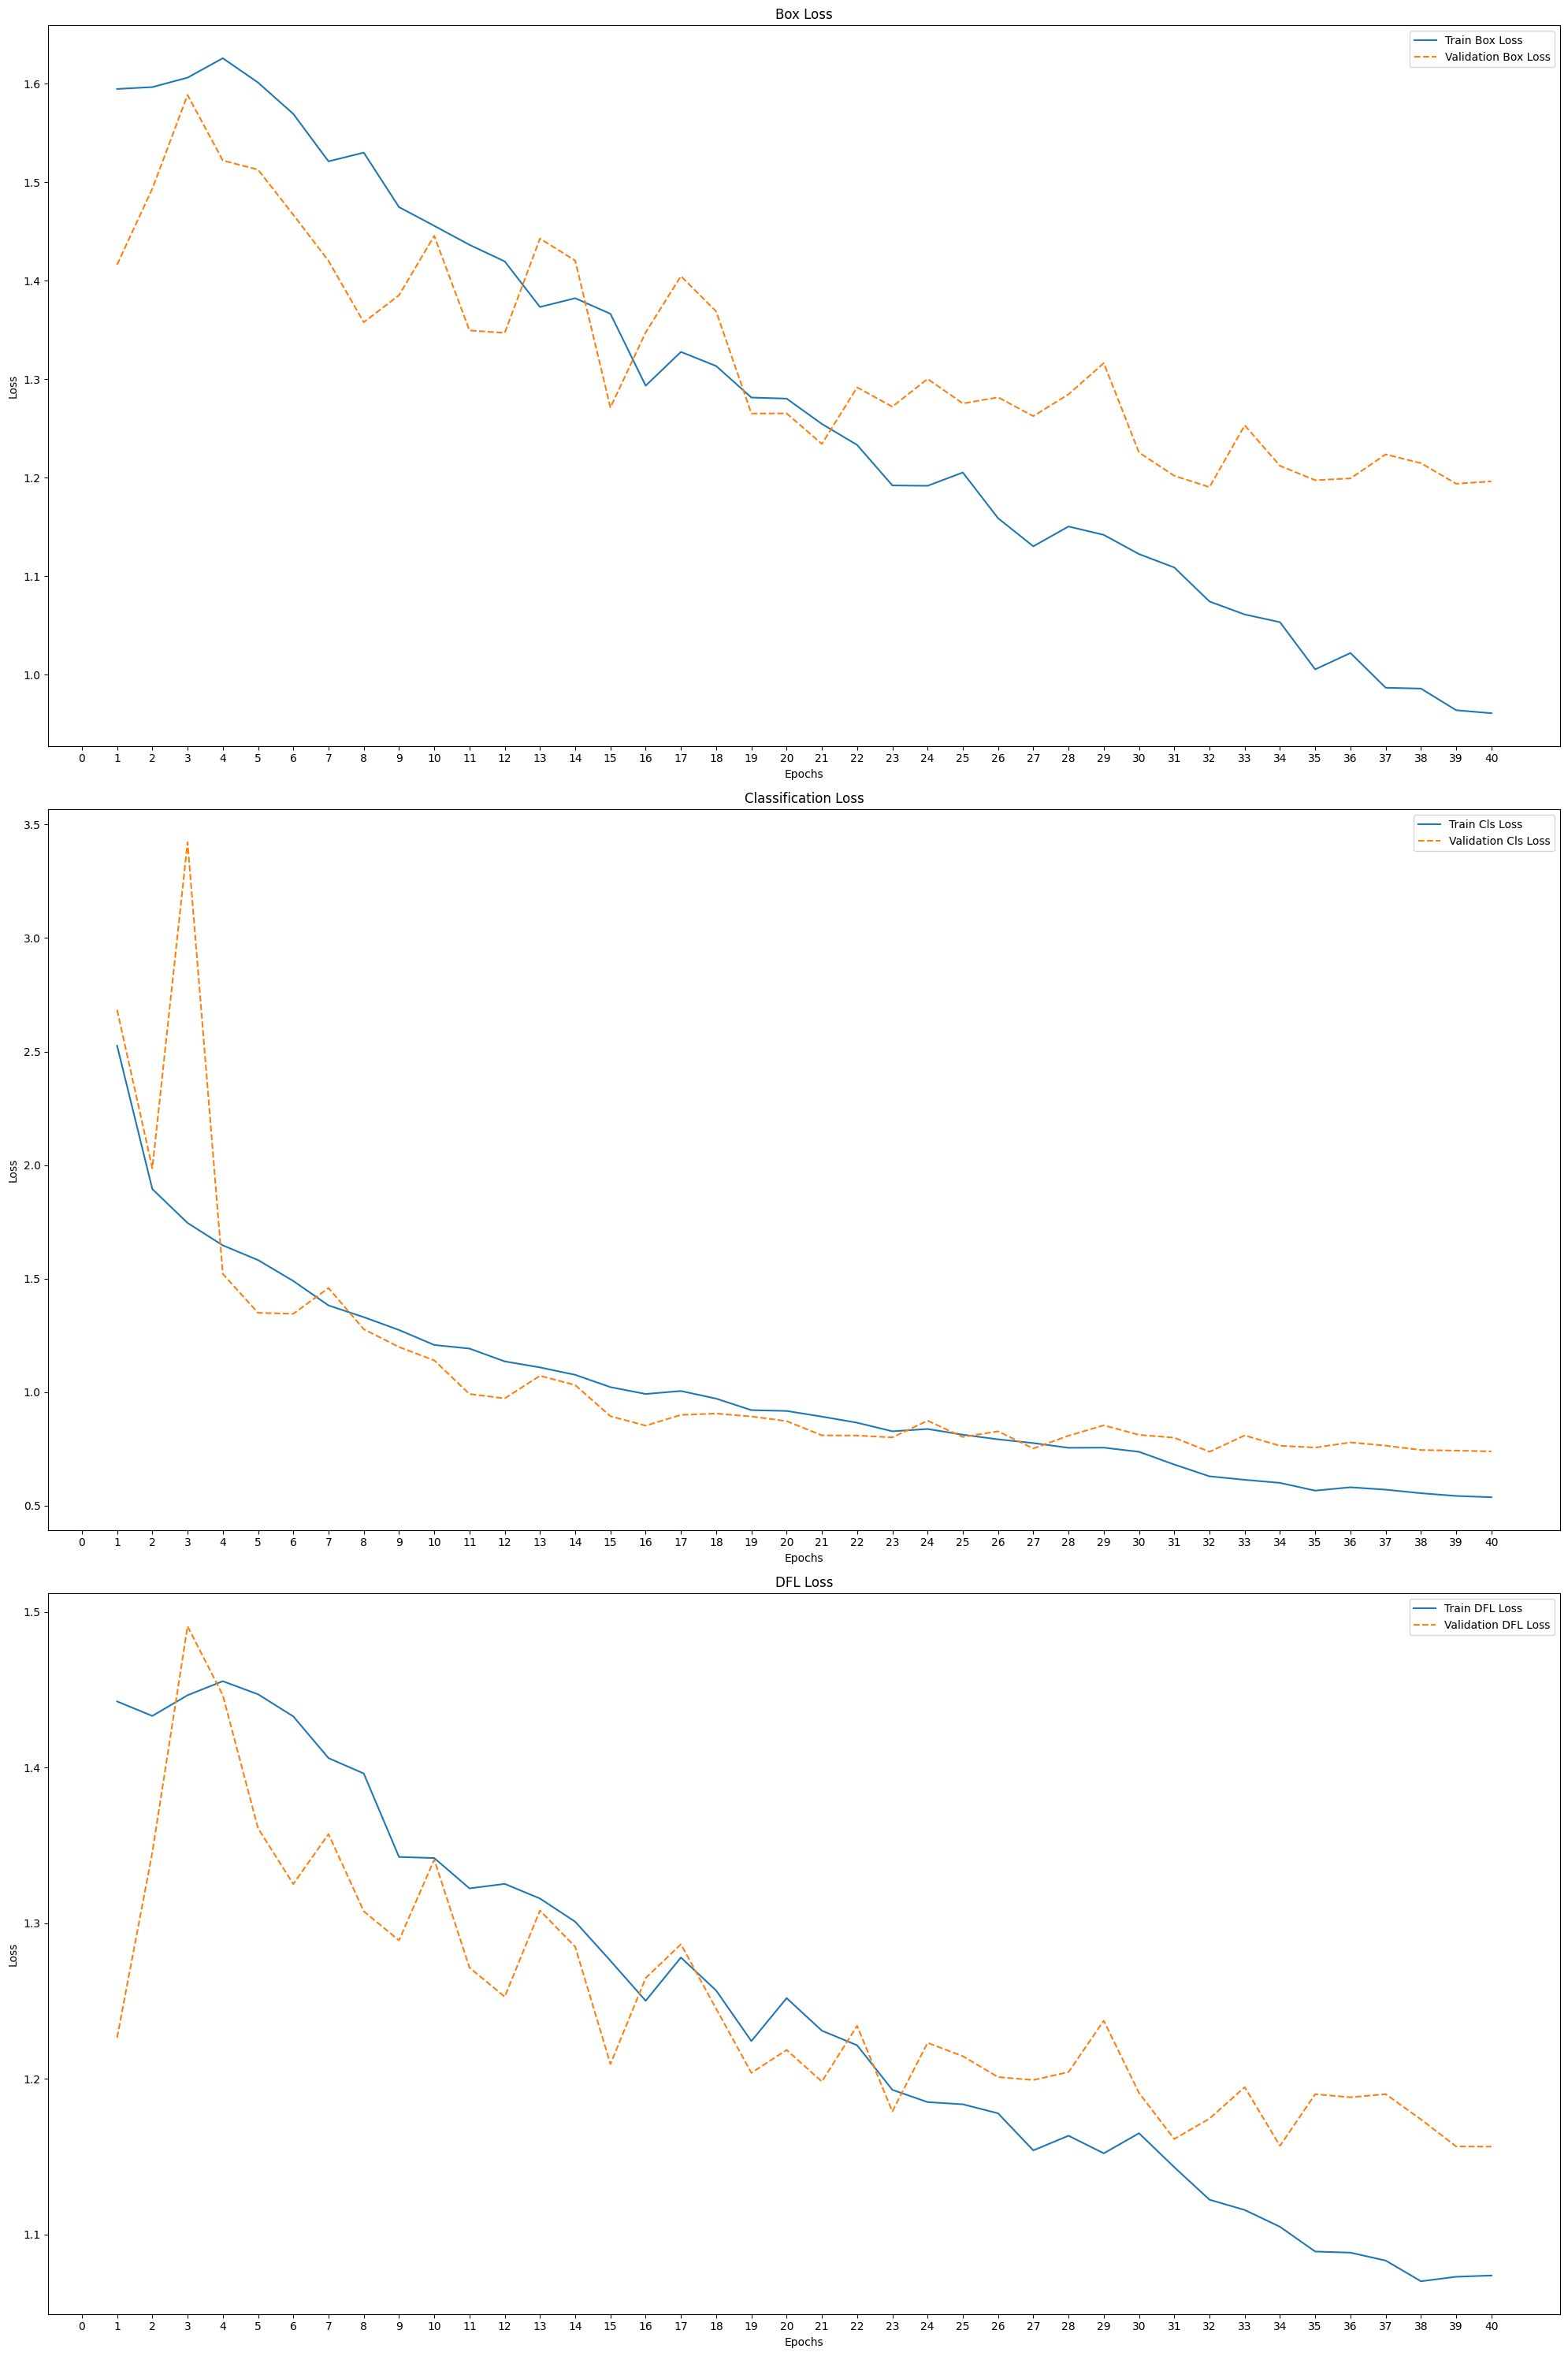

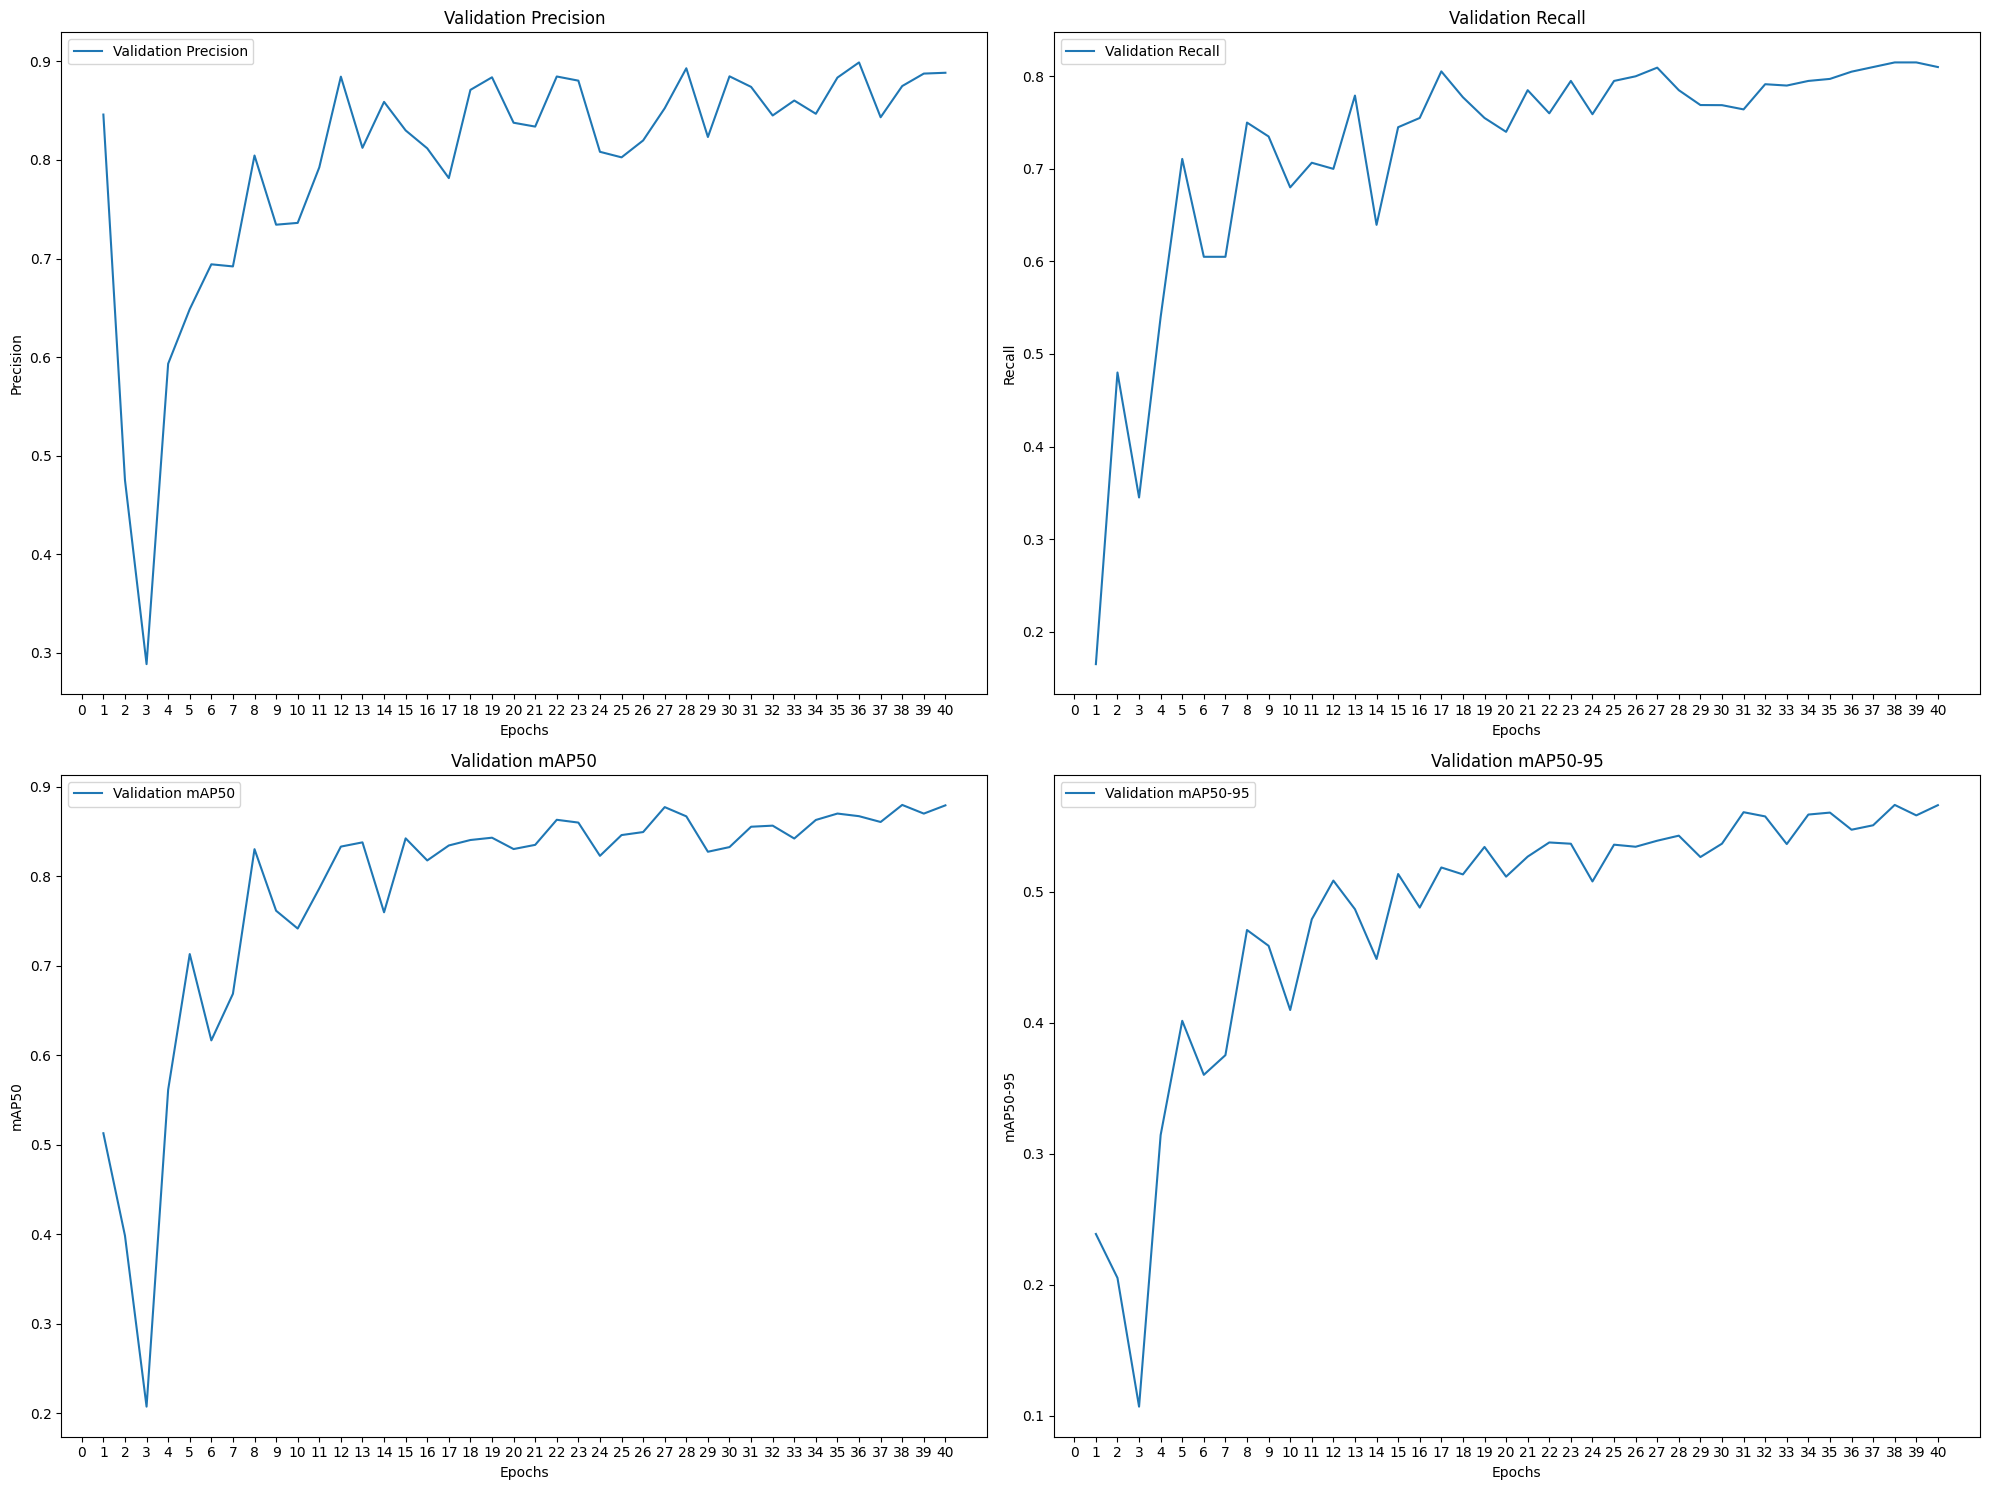

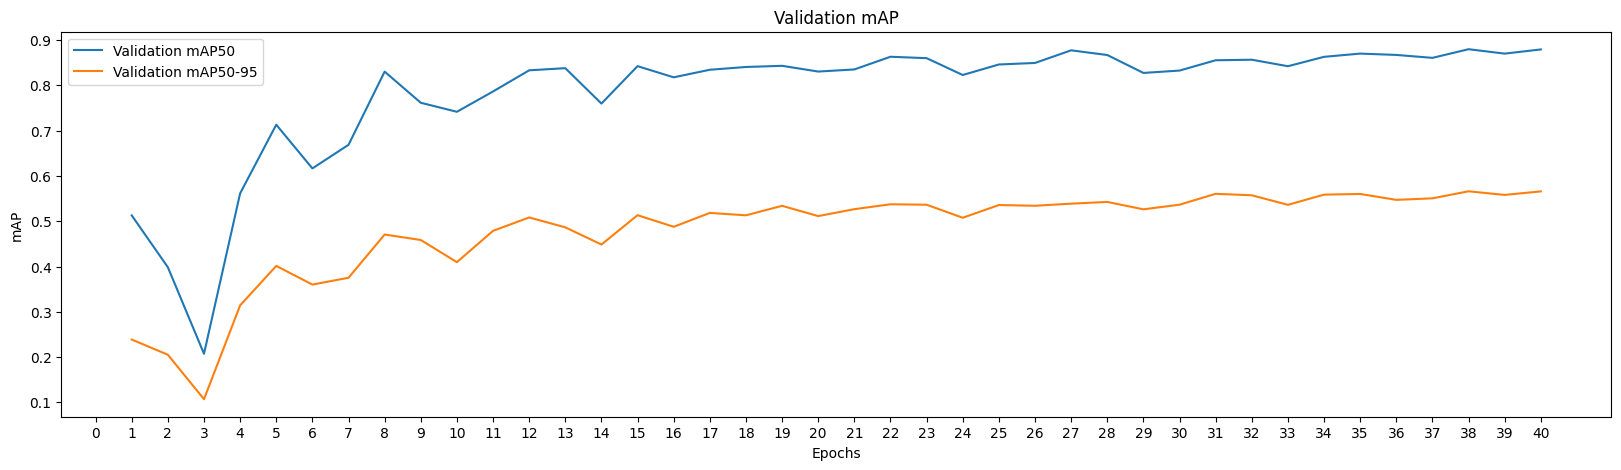

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results.csv file
results_path = '/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/results.csv'  # Update the path if necessary

# Load the CSV file into a DataFrame
results_df = pd.read_csv(results_path)

# Strip leading and trailing whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Extract the metrics
epochs = results_df['epoch']
train_box_loss = results_df['train/box_loss']
train_cls_loss = results_df['train/cls_loss']
train_dfl_loss = results_df['train/dfl_loss']
val_box_loss = results_df['val/box_loss']
val_cls_loss = results_df['val/cls_loss']
val_dfl_loss = results_df['val/dfl_loss']
precision = results_df['metrics/precision(B)']
recall = results_df['metrics/recall(B)']
mAP50 = results_df['metrics/mAP50(B)']
mAP50_95 = results_df['metrics/mAP50-95(B)']

# Plot training and validation losses
plt.figure(figsize=(20, 30))

plt.subplot(3, 1, 1)
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, val_box_loss, label='Validation Box Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Box Loss')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(epochs, train_cls_loss, label='Train Cls Loss')
plt.plot(epochs, val_cls_loss, label='Validation Cls Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Classification Loss')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(epochs, train_dfl_loss, label='Train DFL Loss')
plt.plot(epochs, val_dfl_loss, label='Validation DFL Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('DFL Loss')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/losses_plot.png')
plt.show()

# Plot validation metrics
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.plot(epochs, precision, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Validation Precision')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Validation Recall')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, mAP50, label='Validation mAP50')
plt.xlabel('Epochs')
plt.ylabel('mAP50')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Validation mAP50')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, mAP50_95, label='Validation mAP50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP50-95')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Validation mAP50-95')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/validation_metrics_plot.png')
plt.show()

# Combined plot for validation mAP50 and mAP50-95
plt.figure(figsize=(20, 5))
plt.plot(epochs, mAP50, label='Validation mAP50')
plt.plot(epochs, mAP50_95, label='Validation mAP50-95')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.xticks(range(0, len(epochs)+1, 1))
plt.title('Validation mAP')
plt.legend()
plt.savefig('/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/combined_map_plot.png')
plt.show()


### Graph Evaluations

#### Box Loss
- **Graph**: Box Loss vs. Epochs
- **Explanation**: Shows the loss for bounding box regression during training and validation. Both losses decrease over epochs, indicating improved model accuracy in locating objects.

#### Classification Loss
- **Graph**: Classification Loss vs. Epochs
- **Explanation**: Shows the loss for object classification. Both training and validation losses decrease, reflecting better performance in correctly identifying objects.

#### DFL Loss
- **Graph**: DFL (Distribution Focal Loss) vs. Epochs
- **Explanation**: Indicates the model's performance in differentiating between object and background. Decreasing trends in both training and validation losses suggest improved distinction over epochs.

#### Validation Precision
- **Graph**: Validation Precision vs. Epochs
- **Explanation**: Measures the proportion of true positive predictions. Precision stabilizes at around 0.9, indicating high accuracy in correctly identifying objects without false positives.

#### Validation Recall
- **Graph**: Validation Recall vs. Epochs
- **Explanation**: Measures the model's ability to detect all relevant objects. Recall stabilizes around 0.8, indicating the model consistently identifies most objects.

#### Validation mAP50
- **Graph**: Validation mAP50 vs. Epochs
- **Explanation**: Mean Average Precision at IoU=0.50. Values stabilize around 0.9, showing the model’s effectiveness in detecting objects with high precision and recall.

#### Validation mAP50-95
- **Graph**: Validation mAP50-95 vs. Epochs
- **Explanation**: Mean Average Precision across IoUs from 0.50 to 0.95. Values rise to about 0.5, indicating the model’s robustness across different IoU thresholds.

#### Combined Validation mAP
- **Graph**: Validation mAP50 and mAP50-95 vs. Epochs
- **Explanation**: Both metrics are shown together. mAP50 is consistently higher, stabilizing around 0.9, while mAP50-95 shows steady improvement, reflecting the model’s increasing robustness.

Overall, these graphs collectively indicate that the model improves over epochs, with decreasing losses and increasing precision, recall, and mAP metrics.

# MODEL PERFORMANCE ON TEST SET:

*Even though it's called val mode, it will use the test set if specified with split=test. Use the following command to evaluate the model on the test set:

In [ ]:
!yolo task=detect mode=val model='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/train/weights/best.pt' data='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/data.yaml' split=test imgsz=640 save_json=True project='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect' name=test


Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/test/labels.cache... 34 images, 3 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67% 2/3 [00:01<00:00,  1.06it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.16it/s]
                   all         34         69      0.907      0.846    

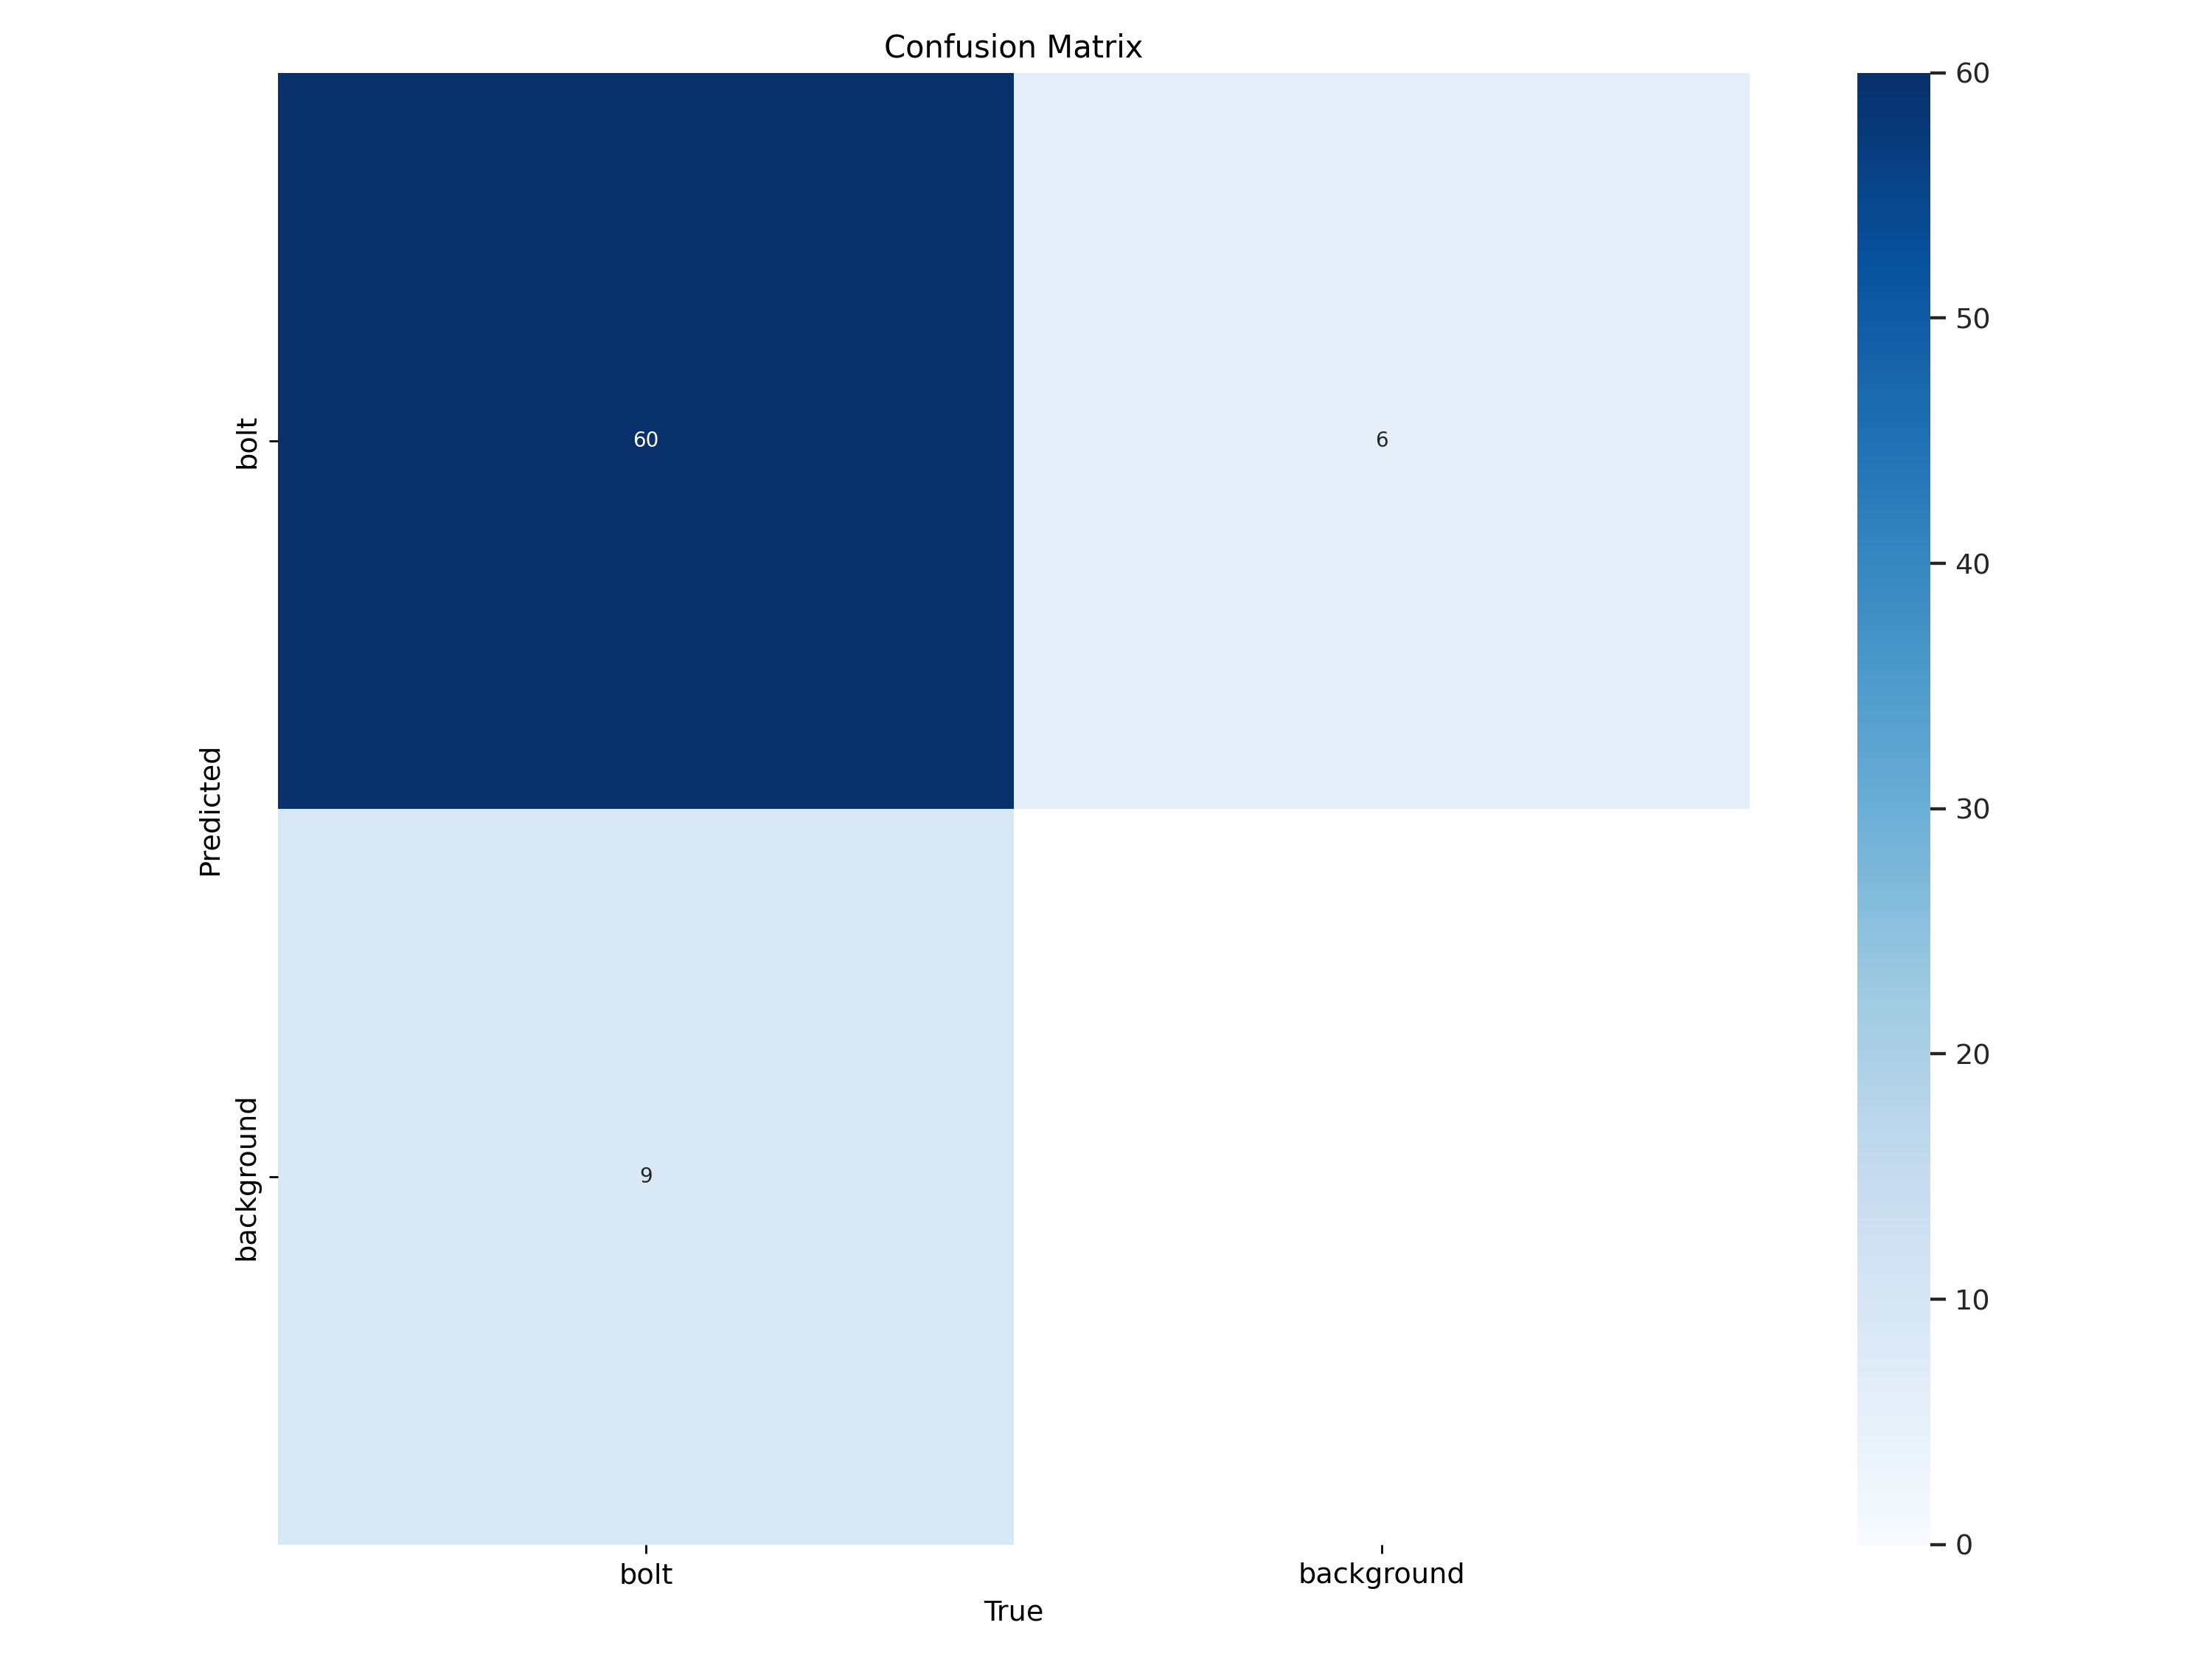

In [ ]:
from IPython.display import Image  # This ensures you are using the Image class from IPython.display

# Now you can display the image using the correct class
Image(filename='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/test/confusion_matrix.png', width=600)

based on the confusion matrix, The model performs well on both the training and test sets, with slightly higher precision and recall on the test set, indicating good generalization.

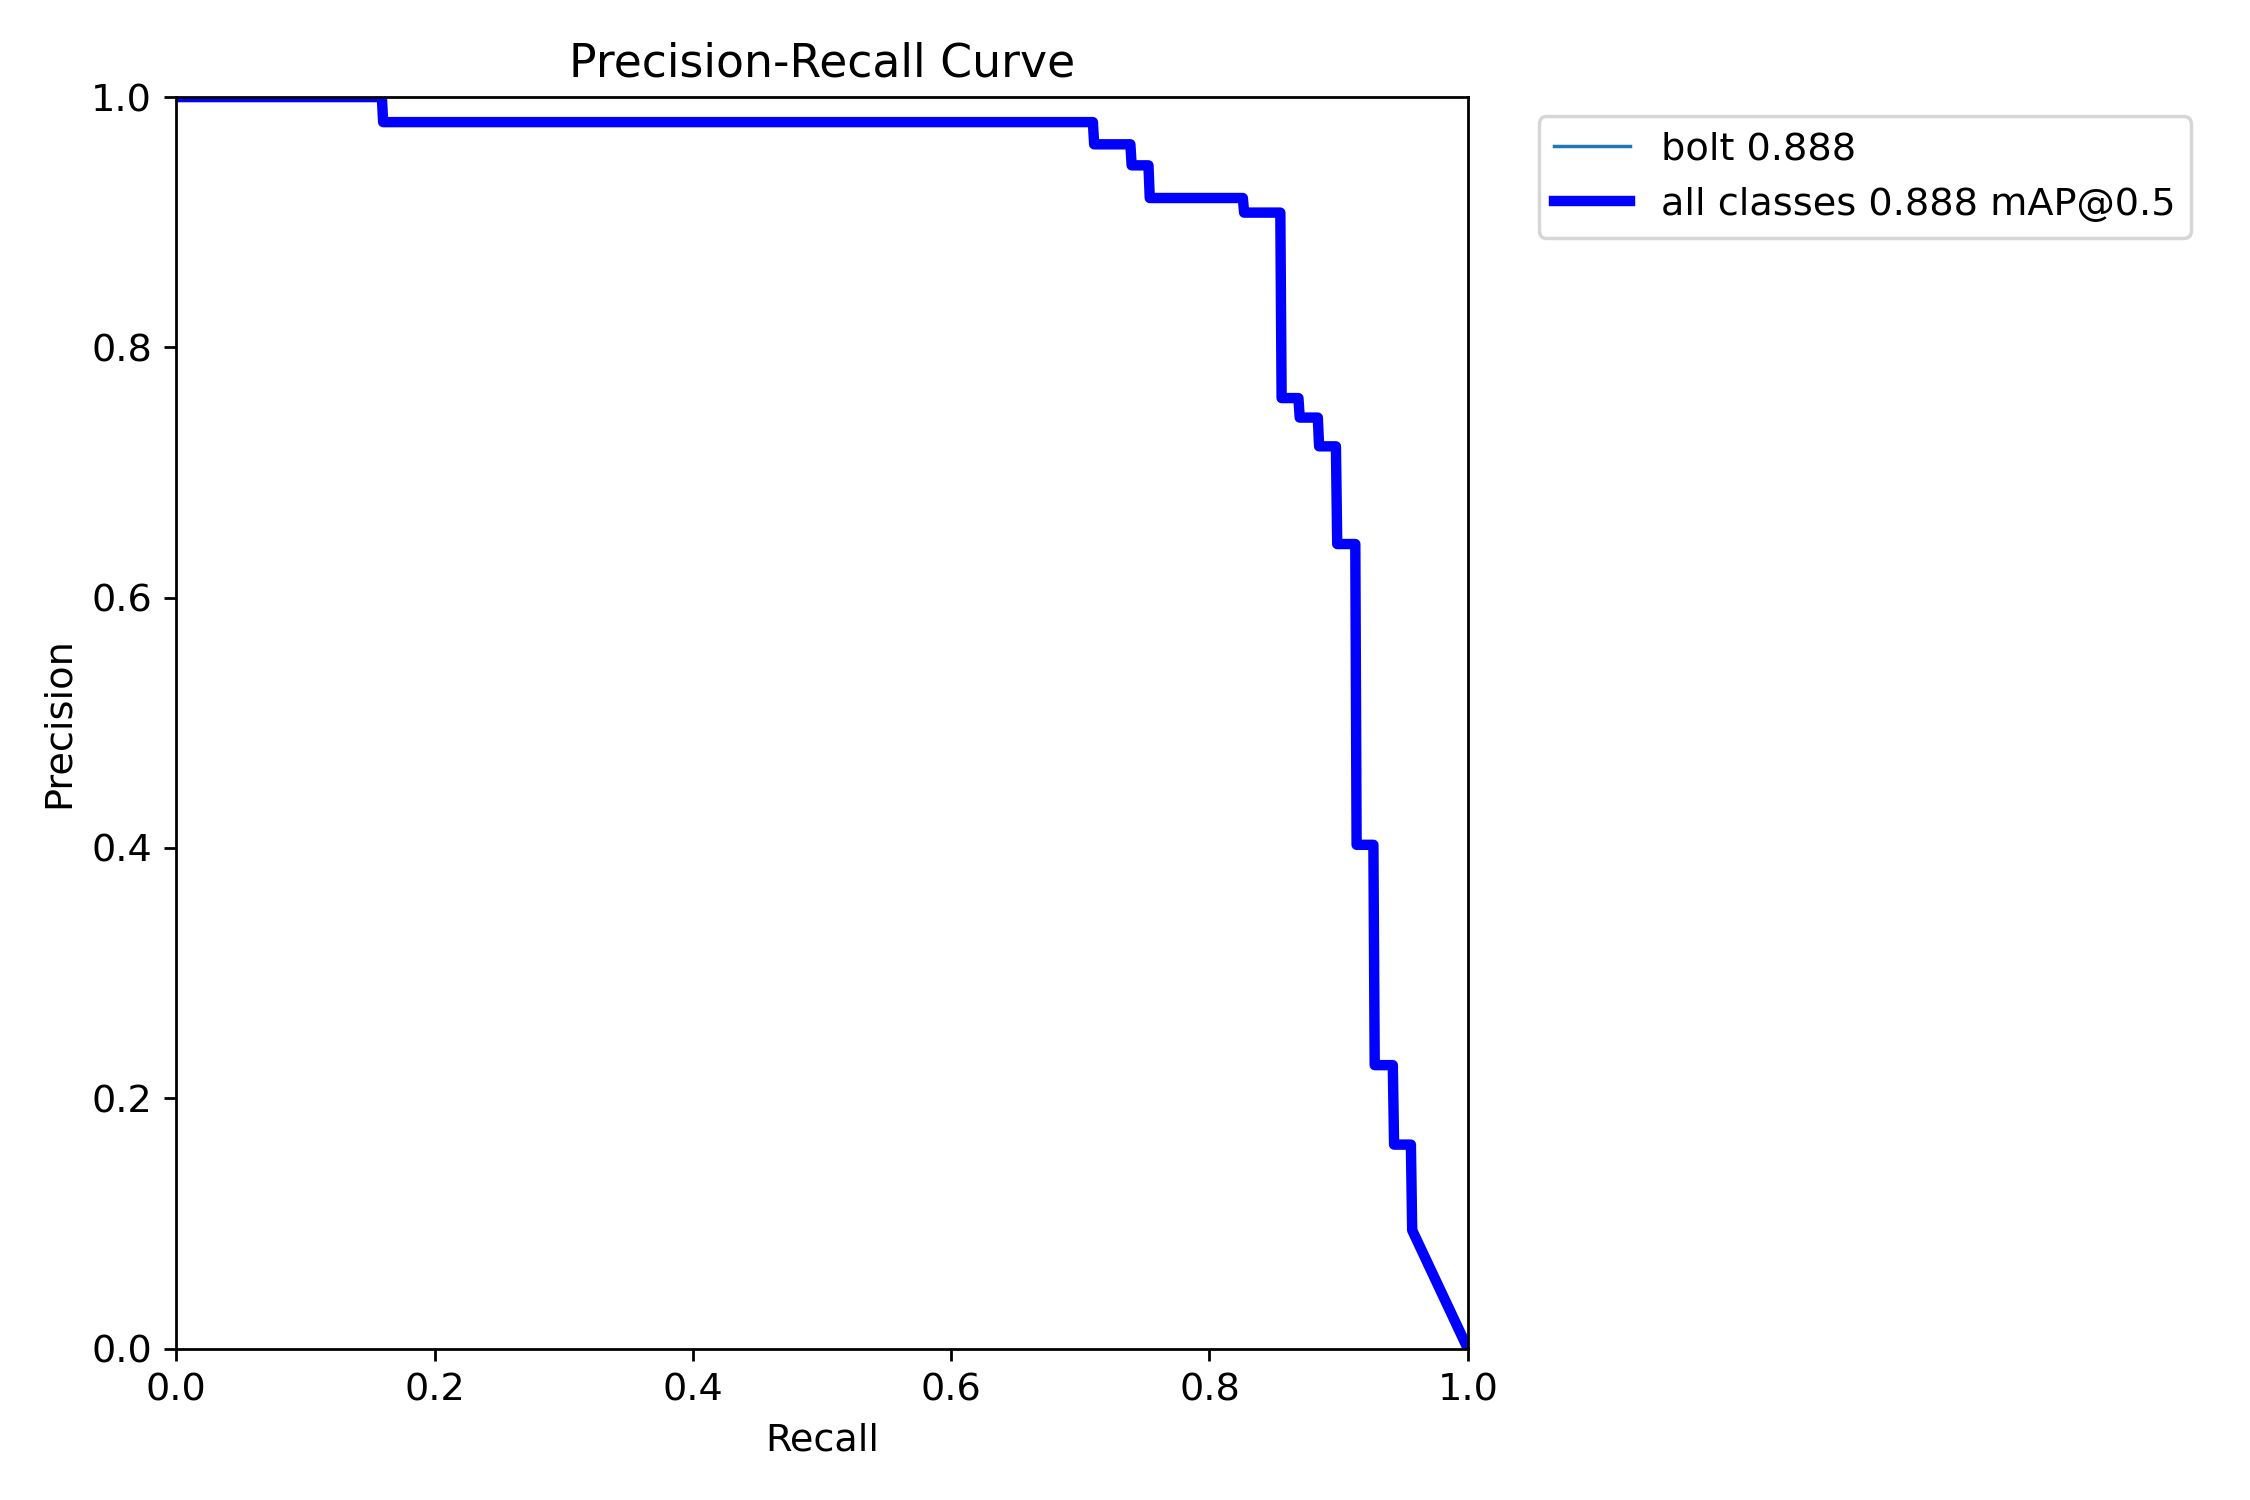

In [ ]:
from IPython.display import Image  # This ensures you are using the Image class from IPython.display

# Now you can display the image using the correct class
Image(filename='/content/drive/My Drive/Colab Notebooks/Bolt Dataset/Bolt-3/runs/detect/test/PR_curve.png', width=600)

### Precision-Recall Curve Evaluation

- **Precision and Recall**: The curve shows a strong trade-off between precision and recall, maintaining high precision until recall starts increasing significantly.
.
- **Overall Performance**: The model demonstrates good balance, with high precision and recall, reflecting effective object detection.

### Displaying Prediction Images

This code snippet searches for images in the specified directory containing predictions from a YOLO model and displays each image in the Jupyter notebook. The `glob` module is used to find all images in the specified path, and `IPython.display.Image` is used to render the images within the notebook, each displayed with a height of 600 pixels.

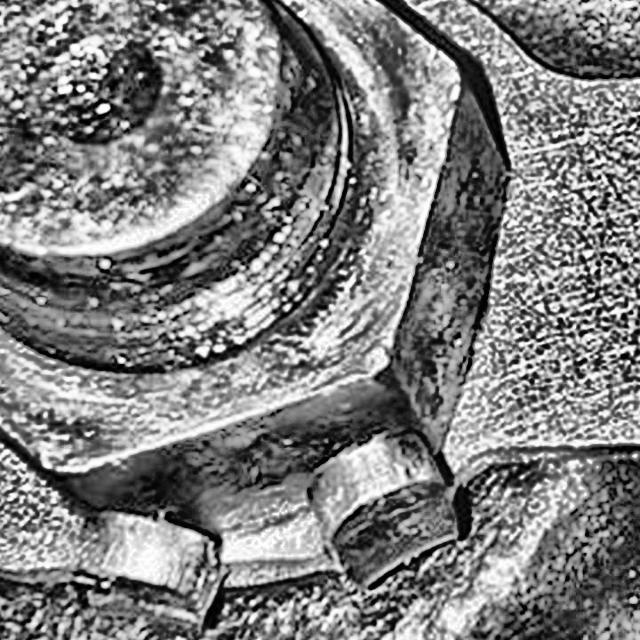

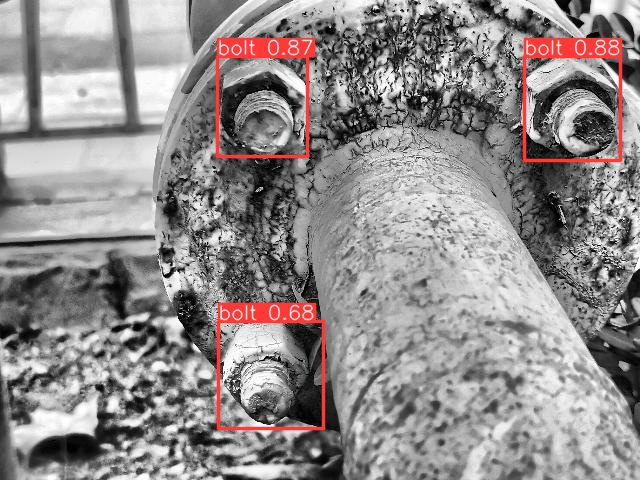

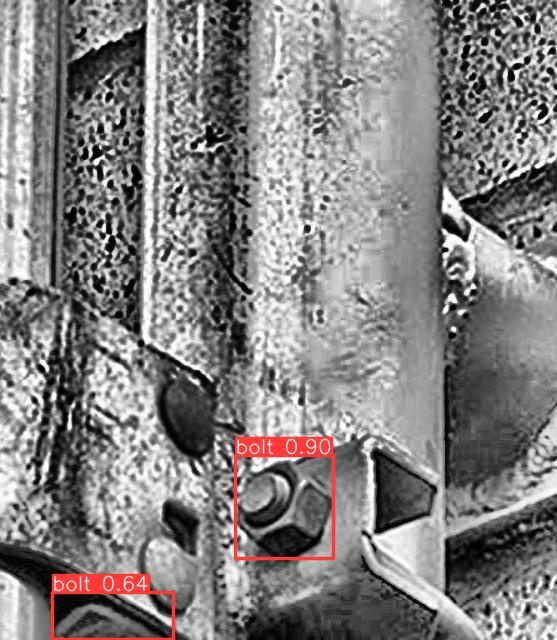

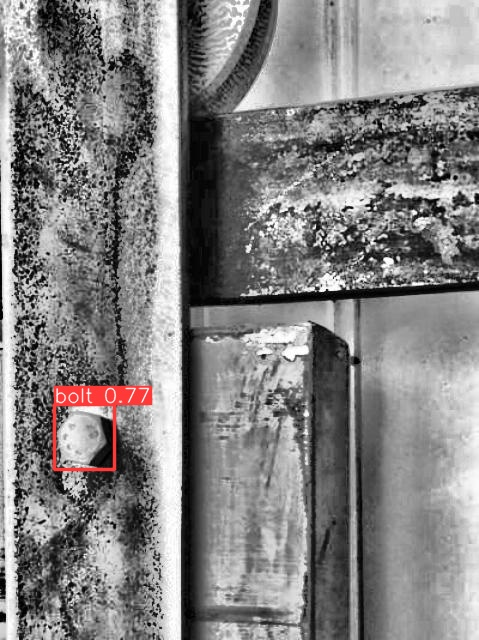

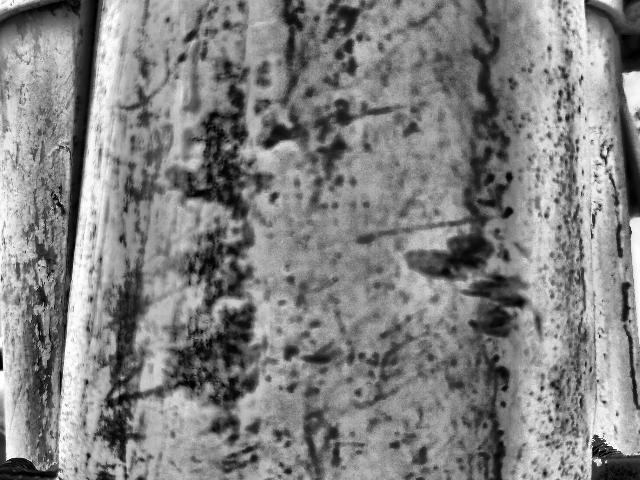

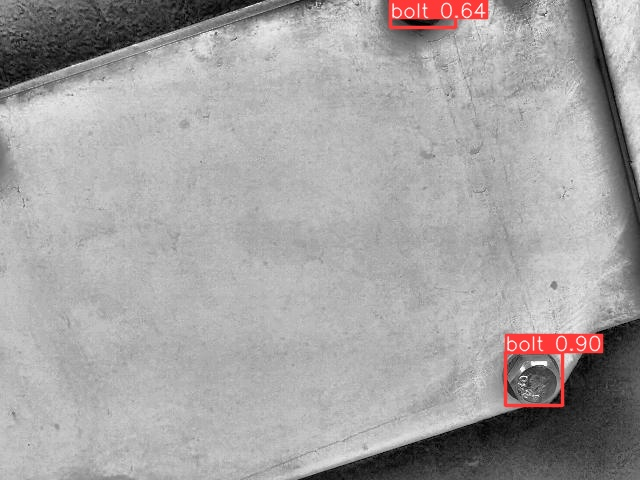

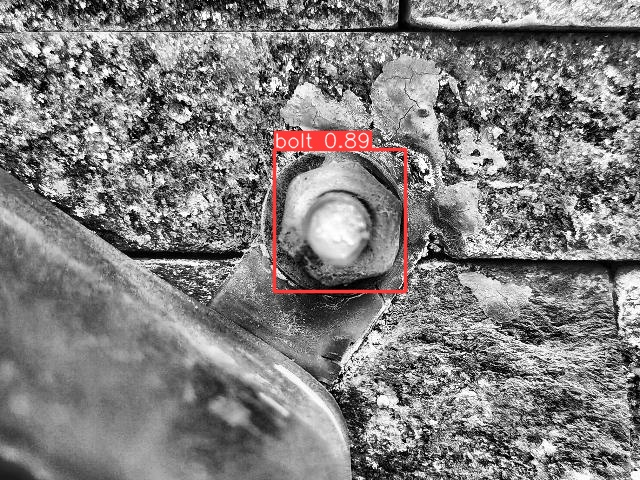

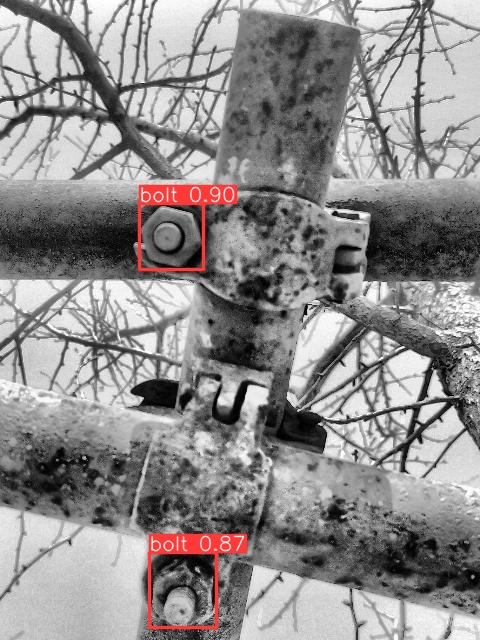

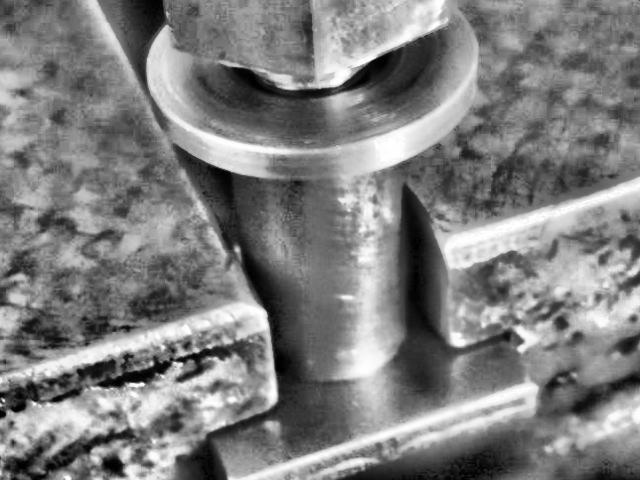

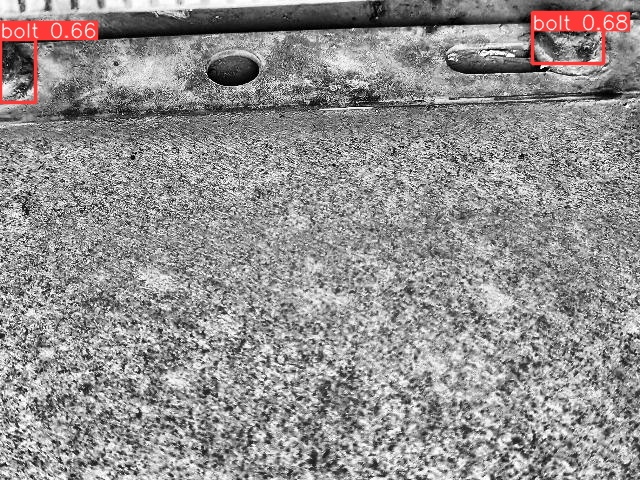

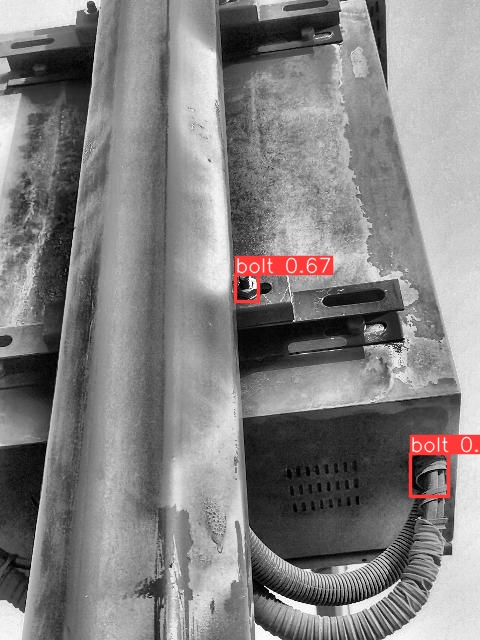

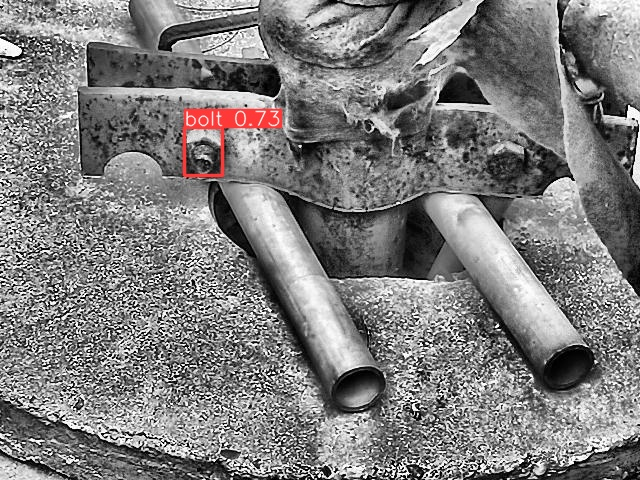

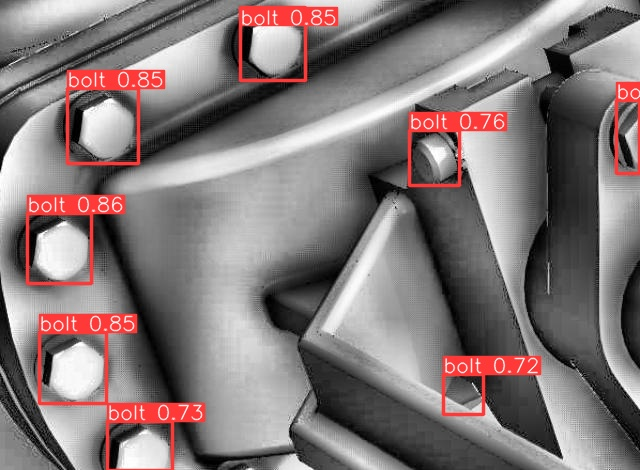

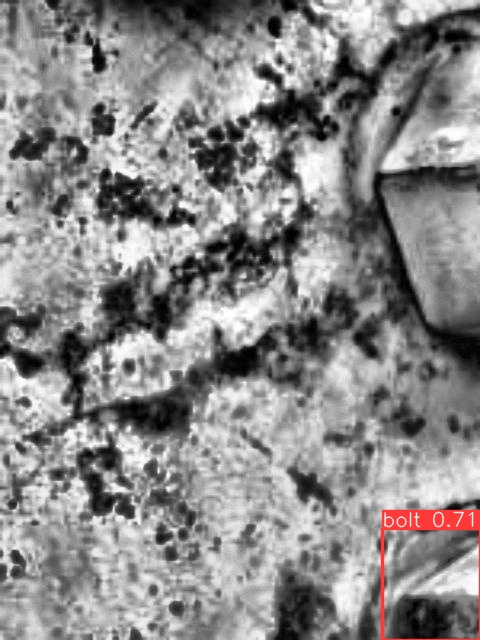

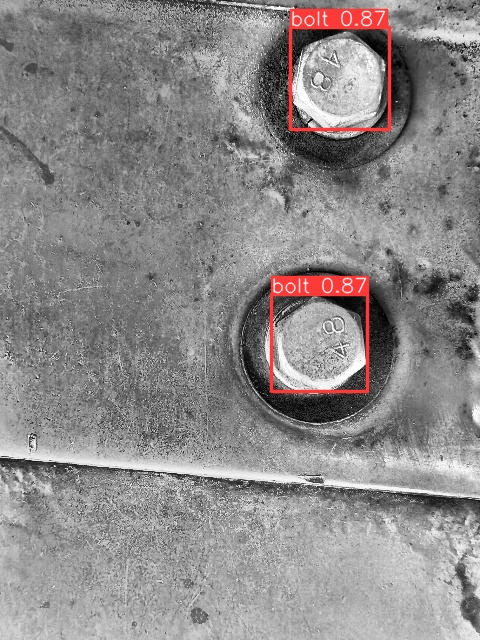

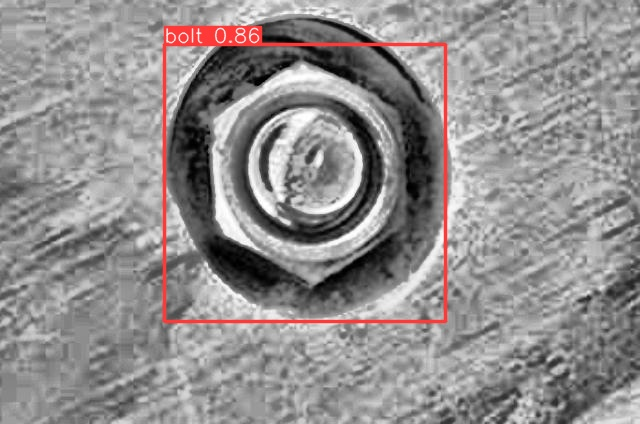

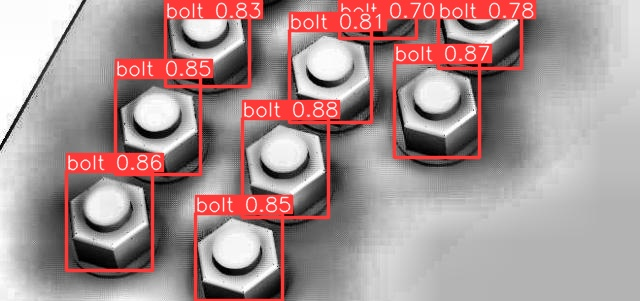

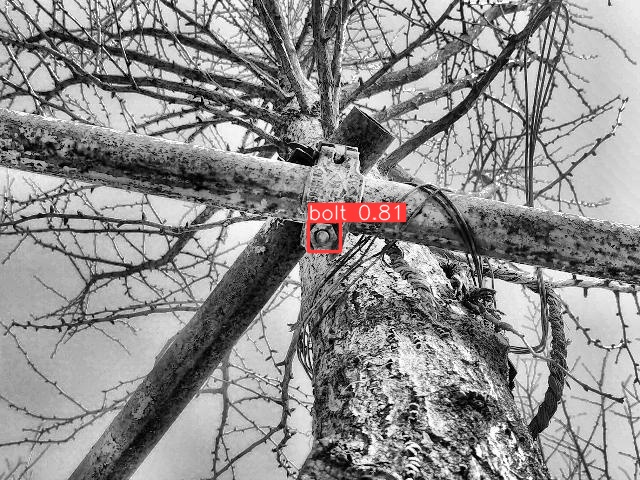

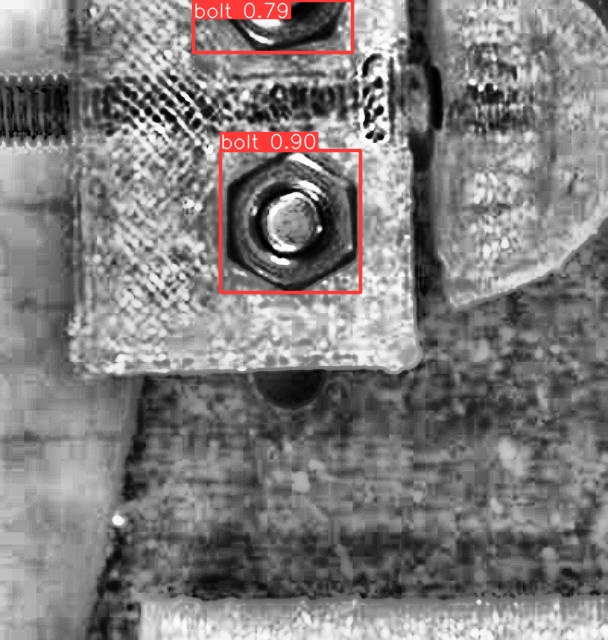

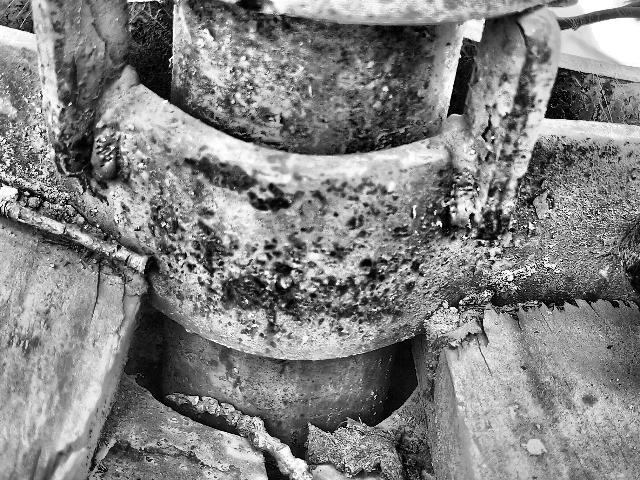

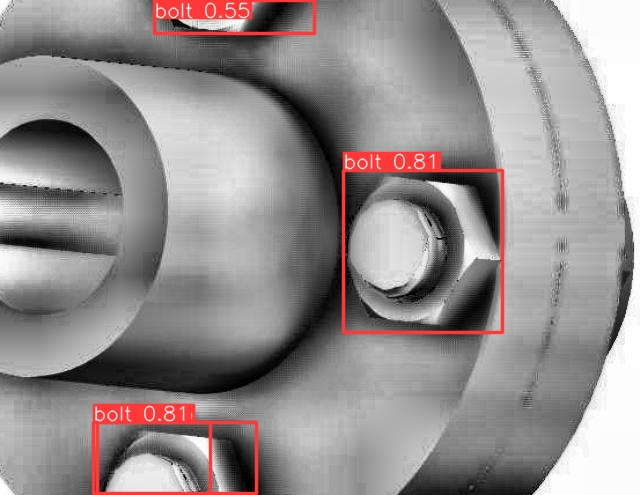

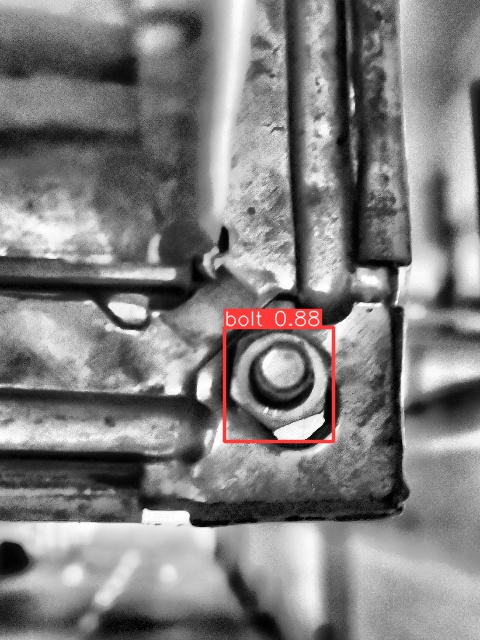

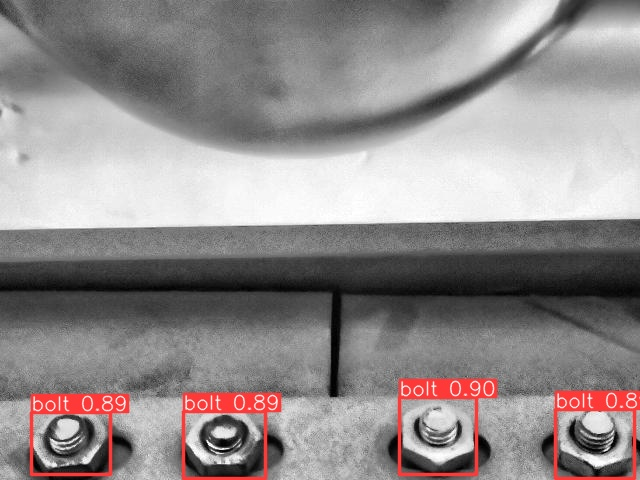

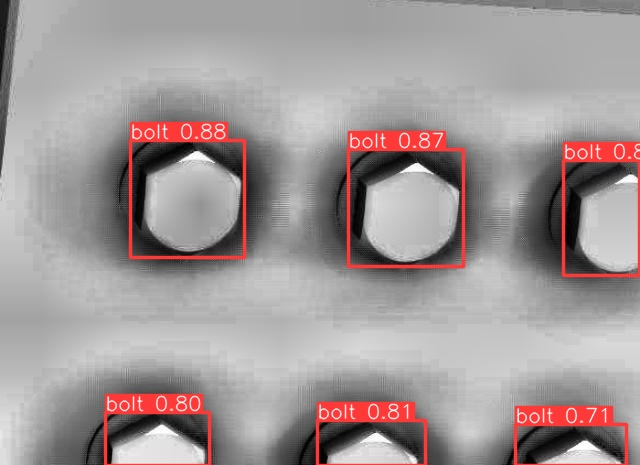

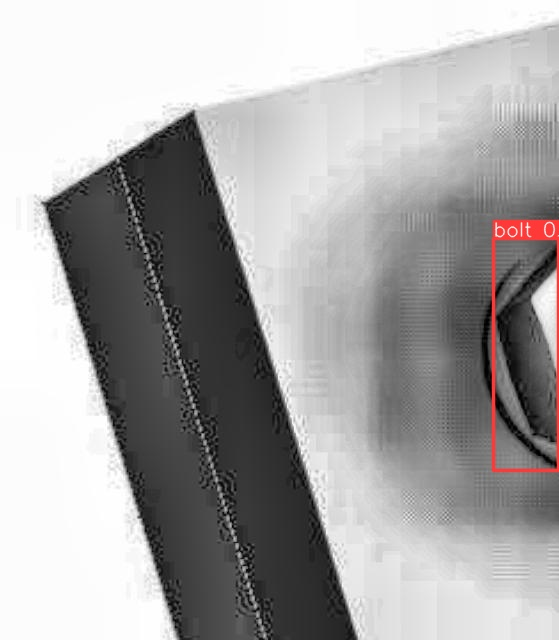

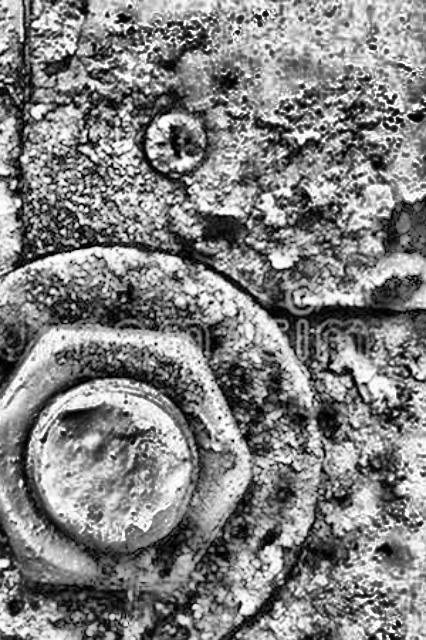

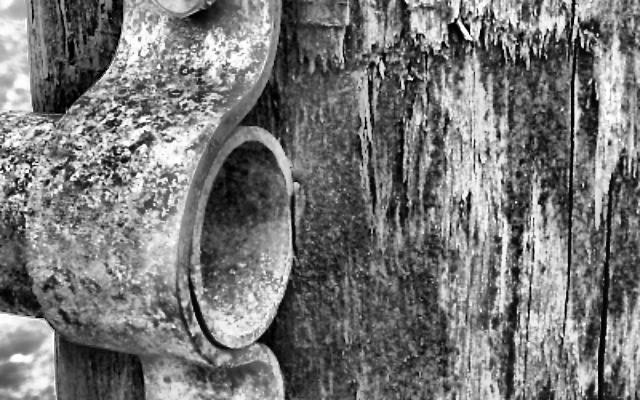

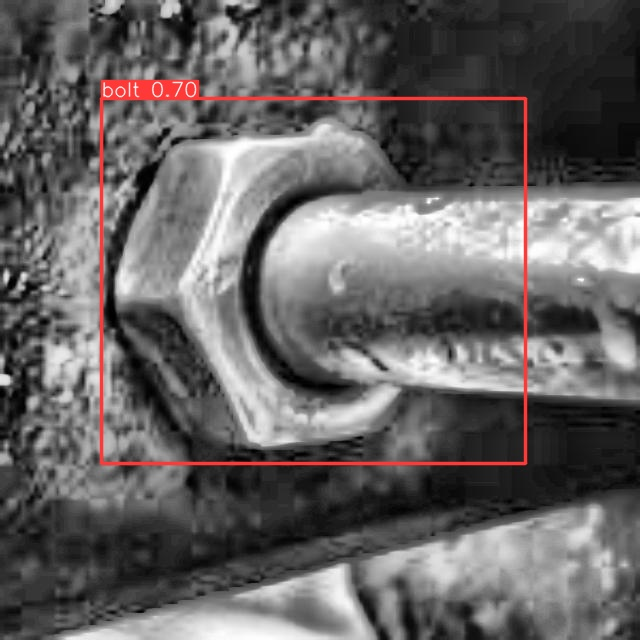

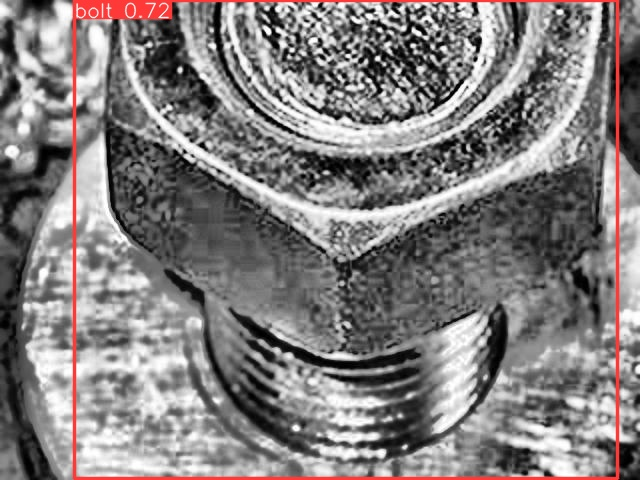

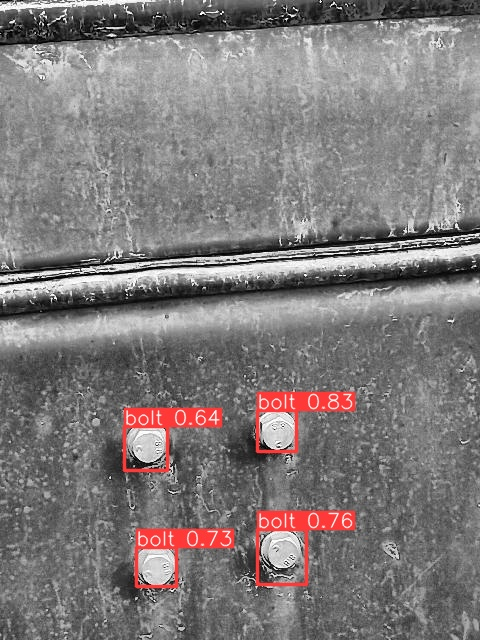

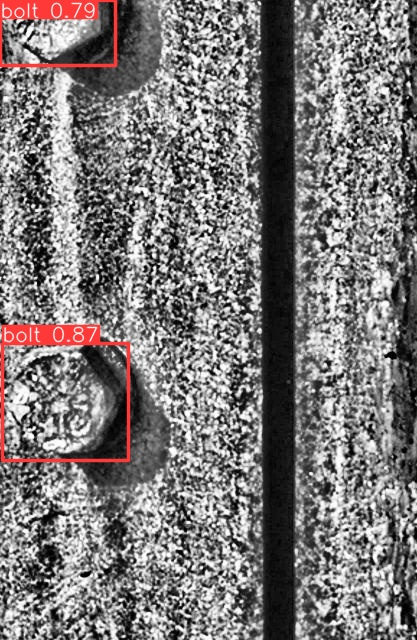

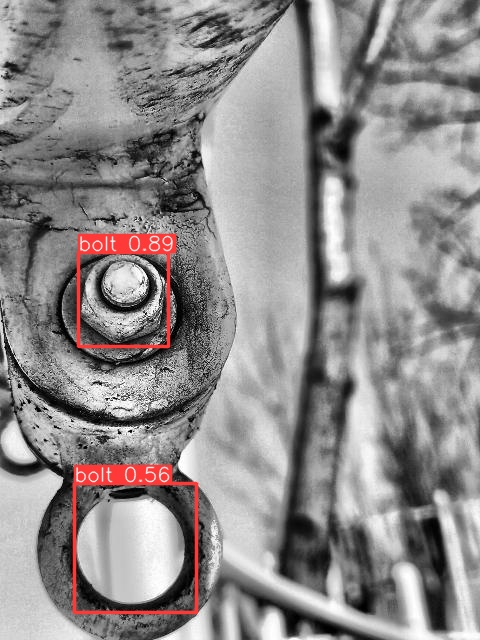

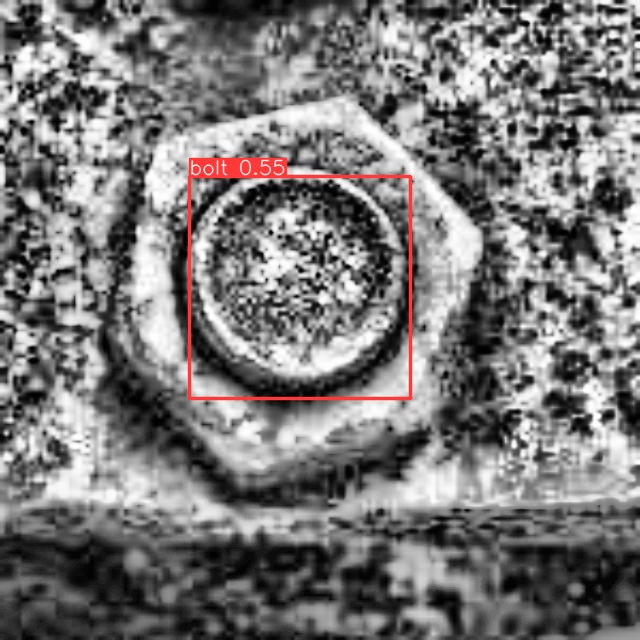

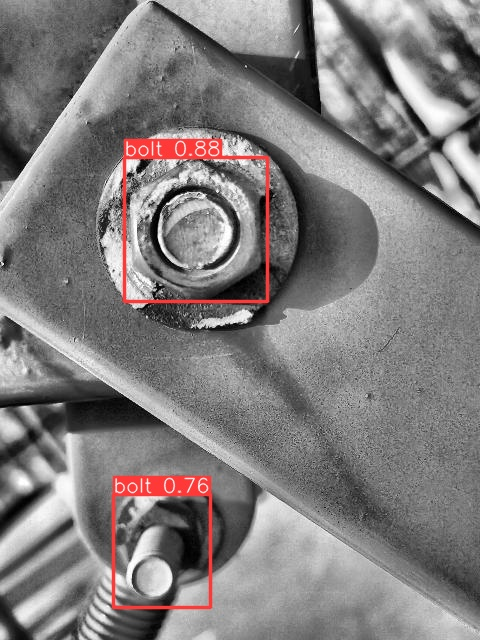

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

# Copying Model Weights to Backup Directory

In [ ]:
import shutil

# Source paths
last_weights_path = '/content/runs/detect/train3/weights/last.pt'
best_weights_path = '/content/runs/detect/train3/weights/best.pt'

# Destination paths
backup_directory = "X:\ML Class\FYP\bolt 6.0" # Change to your preferred backup location
shutil.copy(last_weights_path, backup_directory + 'last_epoch_weights.pt')
shutil.copy(best_weights_path, backup_directory + 'best_performance_weights.pt')

'X:\\ML Class\\FYP\x08olt 6.0best_performance_weights.pt'

### Copying Model Weights to Backup Directory

This code snippet copies the latest and best model weights from a training session to a specified backup directory. Here's a short description of what each part does:

1. **Import shutil**: The `shutil` module is used for high-level file operations.

2. **Source Paths**: Define the paths to the latest and best model weight files:
   - `last_weights_path`: Path to the latest model weights.
   - `best_weights_path`: Path to the best-performing model weights.

3. **Destination Path**: Define the directory where the weights will be backed up:
   - `backup_directory`: Path to the backup location.

4. **Copy Files**: Use `shutil.copy` to copy the weight files to the backup directory with new filenames:
   - Copy the latest weights to `backup_directory` as `last_epoch_weights.pt`.
   - Copy the best weights to `backup_directory` as `best_performance_weights.pt`.




# Downloading Model Weights from Google Colab

In [ ]:
from google.colab import files

# Paths to your files
last_weights_path = '/content/runs/detect/train3/weights/last.pt'
best_weights_path = '/content/runs/detect/train3/weights/best.pt'

# Trigger the download
files.download(last_weights_path)
files.download(best_weights_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



This code snippet is used to download the latest and best model weight files from a Google Colab environment to your local machine. Here's a brief explanation of what each part does:

1. **Import `files` from Google Colab**:
   - Allows the use of Google Colab's file operations to download files.

2. **Paths to Files**:
   - `last_weights_path`: Path to the latest model weights.
   - `best_weights_path`: Path to the best-performing model weights.

3. **Trigger the Download**:
   - `files.download(last_weights_path)`: Initiates the download of the latest model weights.
   - `files.download(best_weights_path)`: Initiates the download of the best-performing model weights.

# Trigger the download
files.download(last_weights_path)
files.download(best_weights_path)
```

REAL-TIME BOLT DETECTION MODEL INFERENCING

by using the downloaded best weight model, the weight is then used for inferencing for real time bolt detecton using webcam through the code below:

In [ ]:
rom ultralytics import YOLO
import cv2

# Load the model
model = YOLO(r"X:\ML Class\FYP\bolt 6.0\best (1).pt")

# Run predictions and display results using the built-in functionality
model.predict(source=0, show=True, conf=0.5)  # source '0' for webcam, show=True to display results